In [1]:
# faceMask hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/07/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


C:\Users\becky\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

subj_idx  block  faceList emotionRating  trial             stimulus  \
0  lbmmswtrr0mpvov      0         3     surprised      0  _faces/HM08_F_X.jpg   
1  lbmmswtrr0mpvov      0         3     surprised      1  _faces/BM17_R_X.jpg   
2  lbmmswtrr0mpvov      0         3     surprised      2  _faces/WF05_S_X.jpg   
3  lbmmswtrr0mpvov      0         3     surprised      3  _faces/BM17_R_L.jpg   
4  lbmmswtrr0mpvov      0         3     surprised      4  _faces/BF10_D_X.jpg   
5  lbmmswtrr0mpvov      0         3     surprised      5  _faces/BF15_F_L.jpg   
6  lbmmswtrr0mpvov      0         3     surprised      6  _faces/AM07_S_X.jpg   
7  lbmmswtrr0mpvov      0         3     surprised      7  _faces/BF10_D_L.jpg   
8  lbmmswtrr0mpvov      0         3     surprised      8  _faces/AM07_S_U.jpg   
9  lbmmswtrr0mpvov      0         3     surprised      9  _faces/BM16_H_U.jpg   

       face model ethnicity sex expression      mask  response        rt  \
0  HM08_F_X  HM08         H   M    fearful  baseline         1  2.248290   
1  BM17_R_X  BM17         B   M  surprised  baseline         1  1.122130   
2  WF05_S_X  WF05         W   F        sad  baseline         0 -1.093135   
3  BM17_R_L  BM17         B   M  surprised     lower         1  1.347000   
4  BF10_D_X  BF10         B   F  disgusted  baseline         0 -1.586875   
5  BF15_F_L  BF15         B   F    fearful     lower         1  1.020070   
6  AM07_S_X  AM07         A   M        sad  baseline         0 -1.092280   
7  BF10_D_L  BF10         B   F  disgusted     lower         0 -1.574250   
8  AM07_S_U  AM07         A   M        sad     upper         0 -1.219265   
9  BM16_H_U  BM16         B   M      happy     upper         0 -1.092995   

   faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  faceSurprised  
0          0              0          100          0        0              0  
1          0              0            0          0        0            100  
2          0              0            0          0      100              0  
3          0              0            0          0        0             50  
4          0            100            0          0        0              0  
5          0              0           50          0        0              0  
6          0              0            0          0      100              0  
7          0             50            0          0        0              0  
8          0              0            0          0       50              0  
9          0              0            0         50        0              0

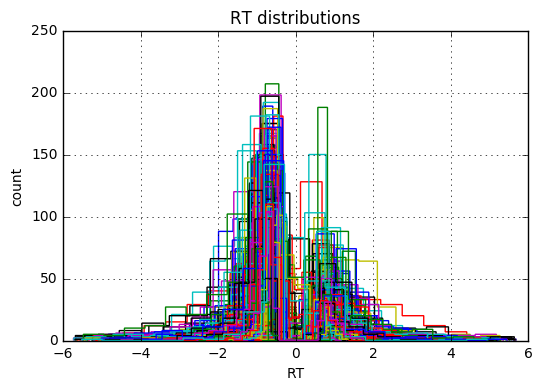

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (surprised) and facial expression (angry)
ra_data = data.loc[(data['emotionRating'] == 'surprised') & (data['expression'] == 'angry')]
ra_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
16   lbmmswtrr0mpvov      0         3     surprised     16   
20   lbmmswtrr0mpvov      0         3     surprised     20   
23   lbmmswtrr0mpvov      0         3     surprised     23   
27   lbmmswtrr0mpvov      0         3     surprised     27   
32   lbmmswtrr0mpvov      0         3     surprised     32   
35   lbmmswtrr0mpvov      0         3     surprised     35   
37   lbmmswtrr0mpvov      0         3     surprised     37   
43   lbmmswtrr0mpvov      0         3     surprised     43   
47   lbmmswtrr0mpvov      0         3     surprised     47   
590  mr81dhy9r5lxu8r      5         2     surprised    271   

                stimulus      face model ethnicity sex expression      mask  \
16   _faces/AM11_A_X.jpg  AM11_A_X  AM11         A   M      angry  baseline   
20   _faces/WM09_A_L.jpg  WM09_A_L  WM09         W   M      angry     lower   
23   _faces/AM11_A_U.jpg  AM11_A_U  AM11         A   M      angry     upper   
27   _faces/WM09_A_X.jpg  WM09_A_X  WM09         W   M      angry  baseline   
32   _faces/WM09_A_U.jpg  WM09_A_U  WM09         W   M      angry     upper   
35   _faces/HF05_A_X.jpg  HF05_A_X  HF05         H   F      angry  baseline   
37   _faces/AM11_A_L.jpg  AM11_A_L  AM11         A   M      angry     lower   
43   _faces/HF05_A_U.jpg  HF05_A_U  HF05         H   F      angry     upper   
47   _faces/HF05_A_L.jpg  HF05_A_L  HF05         H   F      angry     lower   
590  _faces/HF09_A_X.jpg  HF09_A_X  HF09         H   F      angry  baseline   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
16          0 -0.909675        100              0            0          0   
20          0 -1.093720         50              0            0          0   
23          0 -0.803655         50              0            0          0   
27          0 -0.824480        100              0            0          0   
32          0 -0.684190         50              0            0          0   
35          0 -0.697220        100              0            0          0   
37          0 -0.661415         50              0            0          0   
43          0 -0.765650         50              0            0          0   
47          0 -0.859340         50              0            0          0   
590         0 -1.687000        100              0            0          0   

     faceSad  faceSurprised  
16         0              0  
20         0              0  
23         0              0  
27         0              0  
32         0              0  
35         0              0  
37         0              0  
43         0              0  
47         0              0  
590        0              0

In [39]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ra_data = ra_data[(ra_data.subj_idx != 'dqph4ch0mkofejw') & (ra_data.subj_idx != 'hdn2l3df216jykn') & (ra_data.subj_idx != 'me8doxrmo9vj9dx') & (ra_data.subj_idx != 'xs5439nm2v85thb')]

In [40]:
# define model
m_ra = hddm.HDDMRegressor(ra_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 40115.1 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q        50q         75q      97.5q       mc err
a                                   1.87275  0.0571293    1.76695    1.83342    1.87062     1.91082    1.98859   0.00307051
a_std                              0.508276  0.0520231   0.411834   0.471067   0.507896    0.543843   0.613863   0.00299837
a_subj.09coqg8hlpux6fe              2.01831   0.463978    1.25833    1.68059    1.96896     2.30212    3.05326     0.012888
a_subj.0b3t2skj9mlhbkn               1.8159   0.478952    1.02628    1.47441    1.76234     2.11556    2.86906    0.0178758
a_subj.0bcg7mtj2n1jjw9              2.77854   0.408592    2.08651    2.48816    2.74215     3.03054    3.65525   0.00858887
a_subj.0s53r30oouek89b              2.60473   0.531803    1.75202    2.23138    2.53765     2.89671    3.82982    0.0170287
a_subj.0uj9gbhag3o1w1v              1.90324   0.322702    1.35342    1.67243    1.87509     2.09866    2.61113   0.00734146
a_subj.1

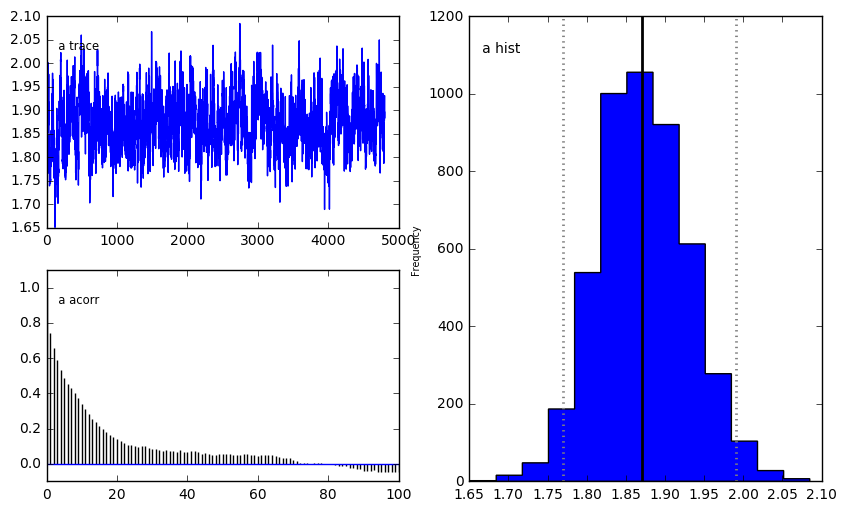

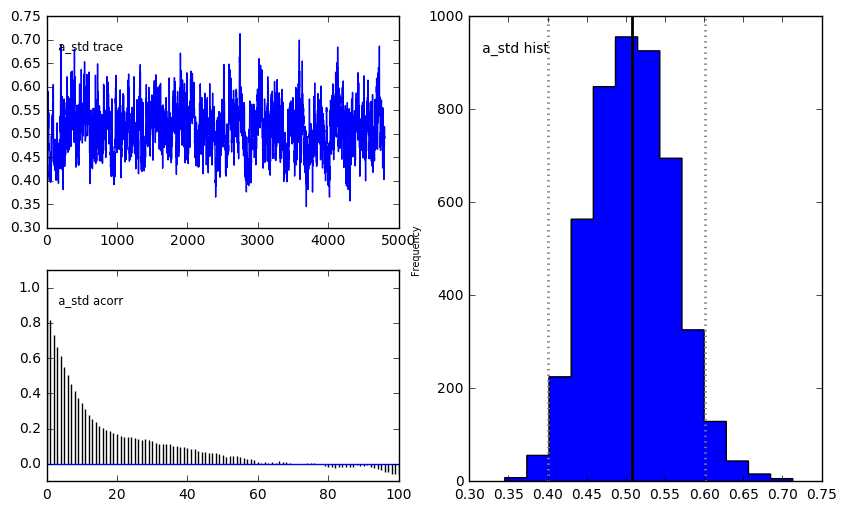

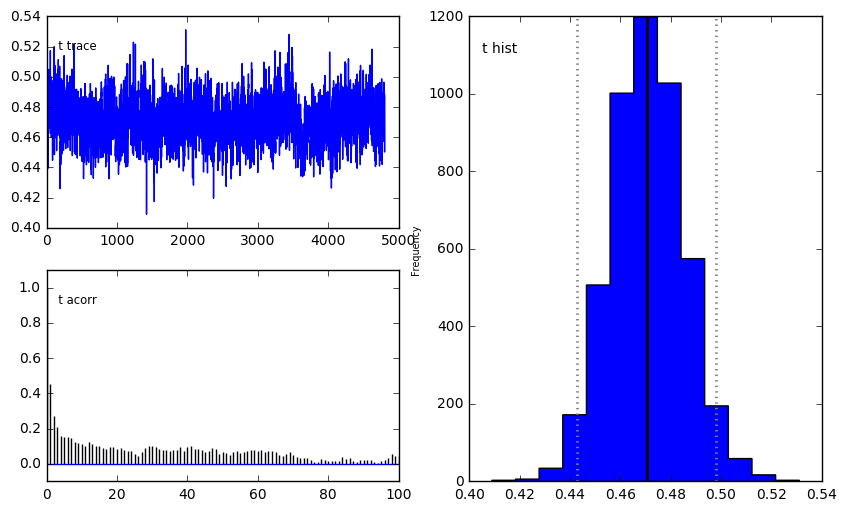

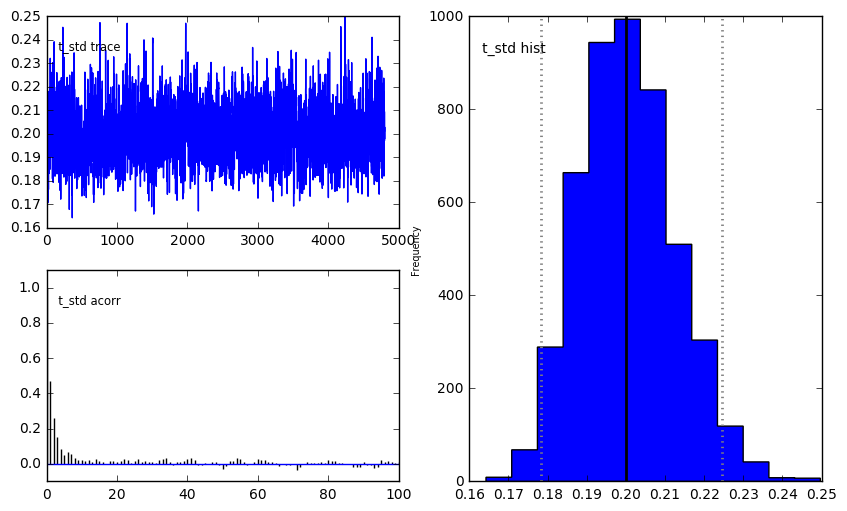

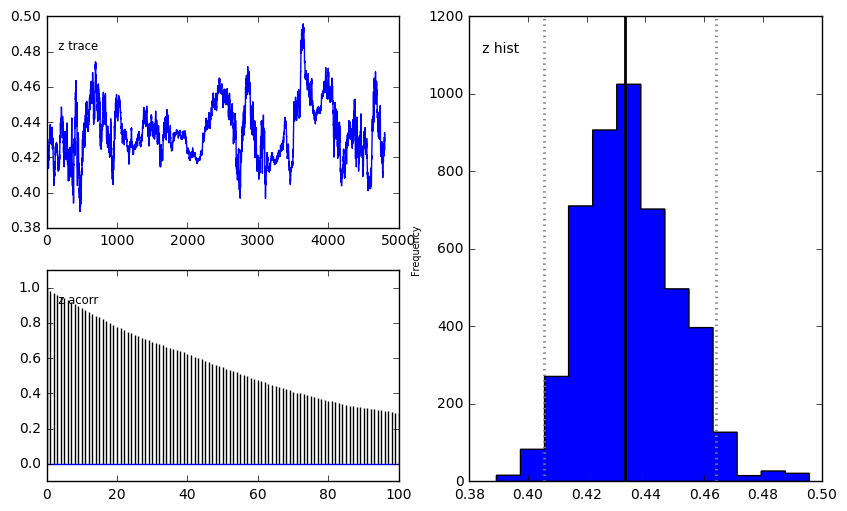

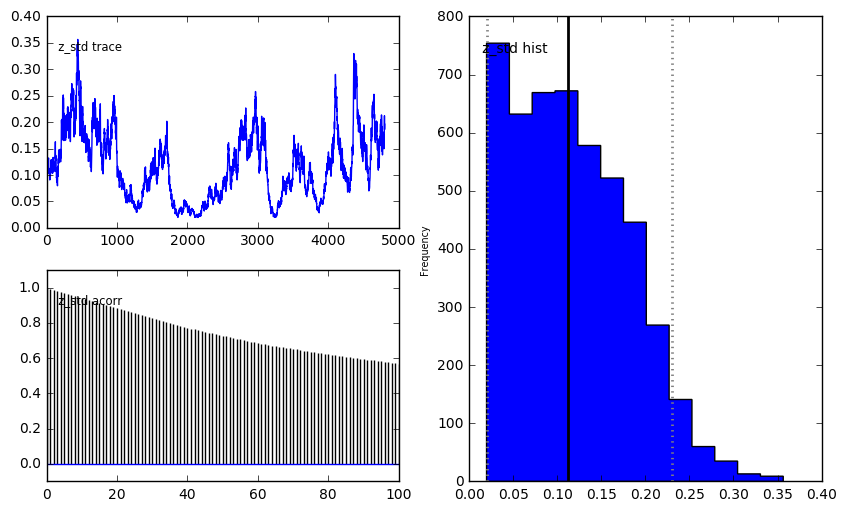

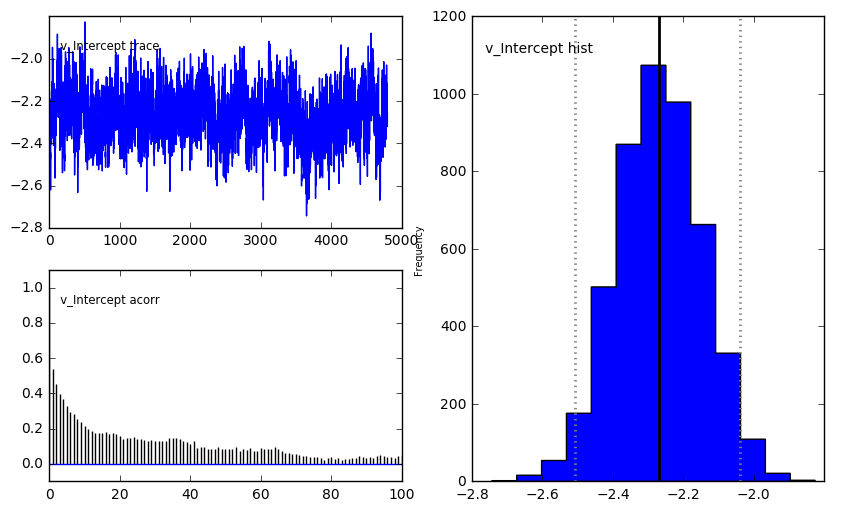

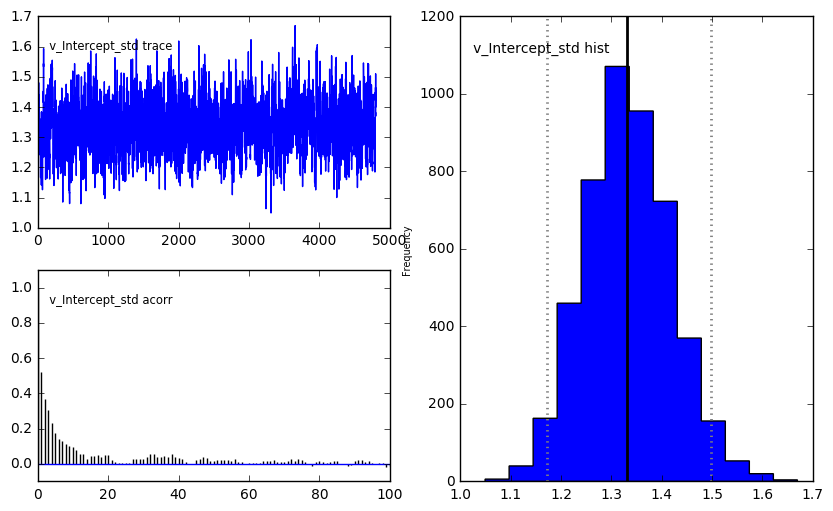

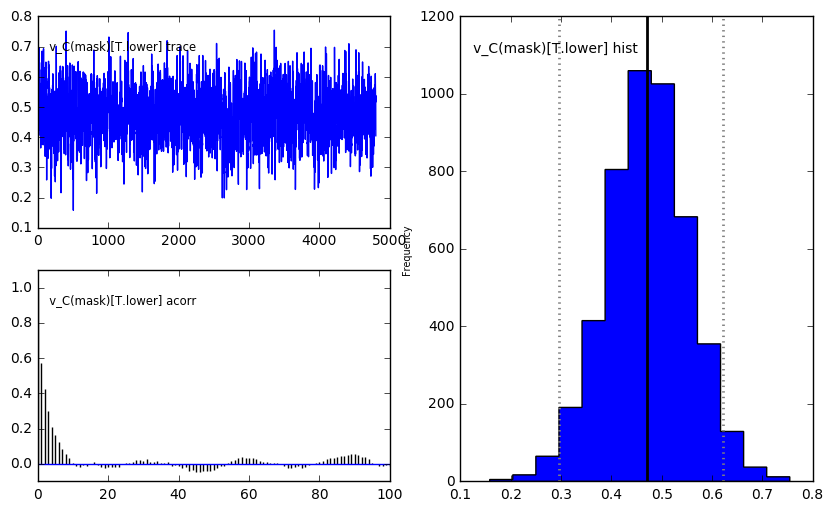

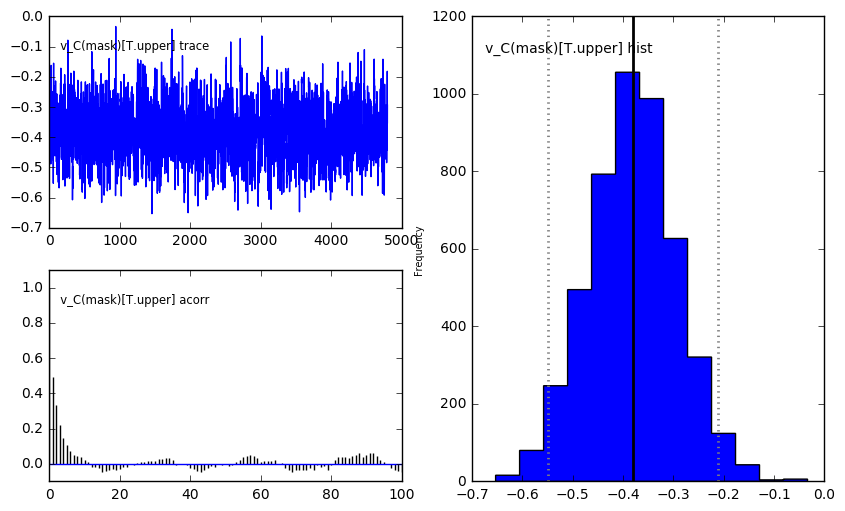

In [41]:
# run model
m_ra.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ra.print_stats()
m_ra.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std       2.5q       25q  \
a                                  1.87275  0.0571293    1.76695   1.83342   
a_std                             0.508276  0.0520231   0.411834  0.471067   
a_subj.09coqg8hlpux6fe             2.01831   0.463978    1.25833   1.68059   
a_subj.0b3t2skj9mlhbkn              1.8159   0.478952    1.02628   1.47441   
a_subj.0bcg7mtj2n1jjw9             2.77854   0.408592    2.08651   2.48816   
a_subj.0s53r30oouek89b             2.60473   0.531803    1.75202   2.23138   
a_subj.0uj9gbhag3o1w1v             1.90324   0.322702    1.35342   1.67243   
a_subj.17nzn4k8r1qkmrn             1.70254   0.305564    1.20533   1.48431   
a_subj.1fdkw2qjx3hc3lk              1.6938   0.407663    1.04823   1.39822   
a_subj.1mla0dmotqefnav             1.85459   0.322349    1.30968   1.62386   
a_subj.23hr9tl84h3zhw3             2.59285   0.382183    1.97301   2.31994   
a_subj.27muqwvalwne26r             1.78846   0.429562     1.0822

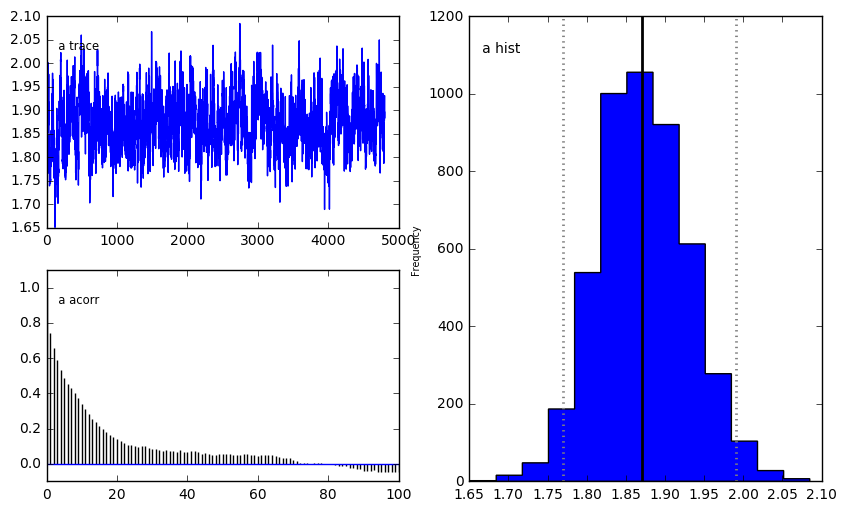

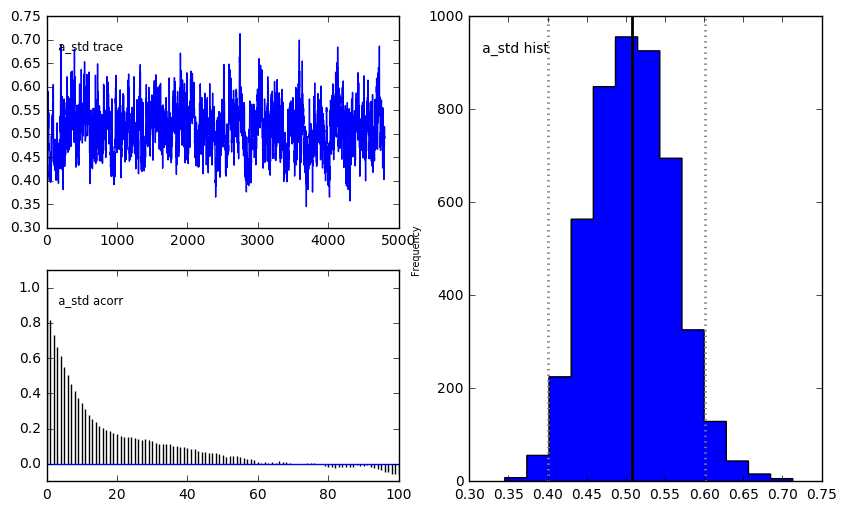

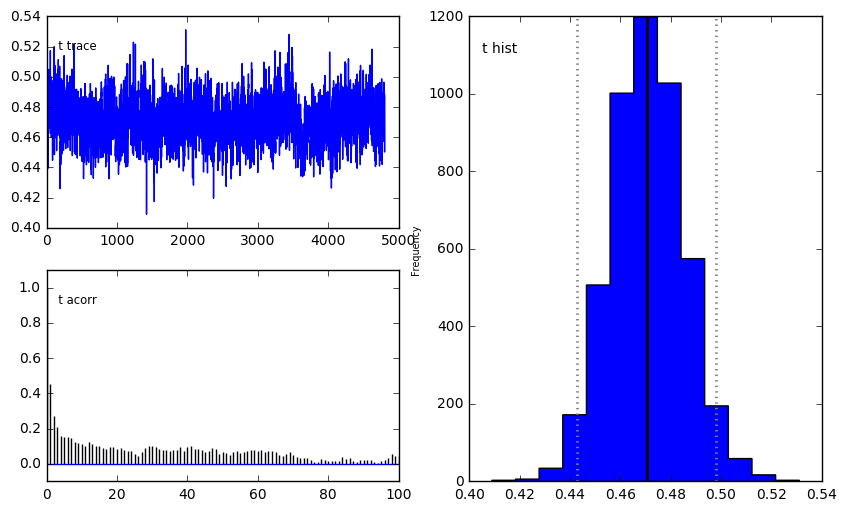

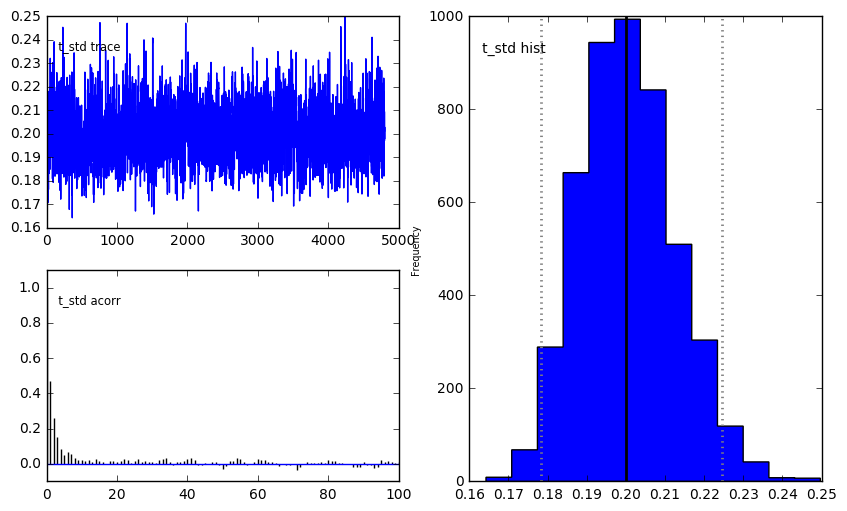

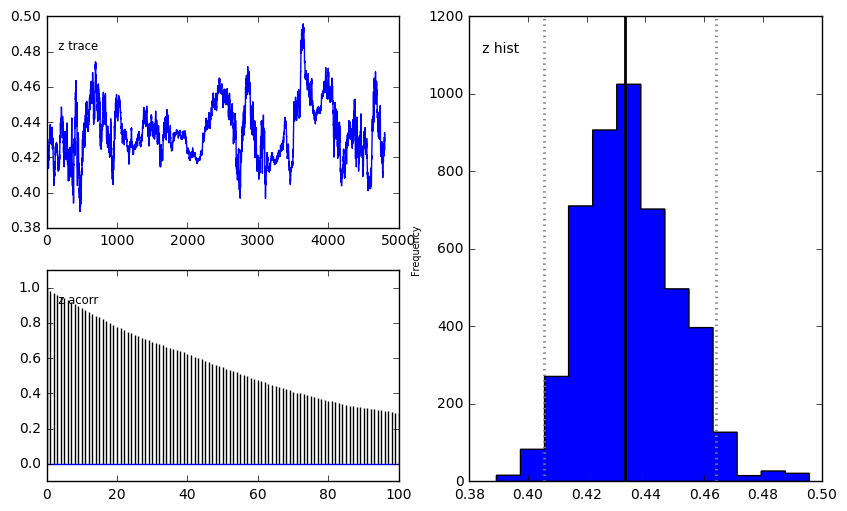

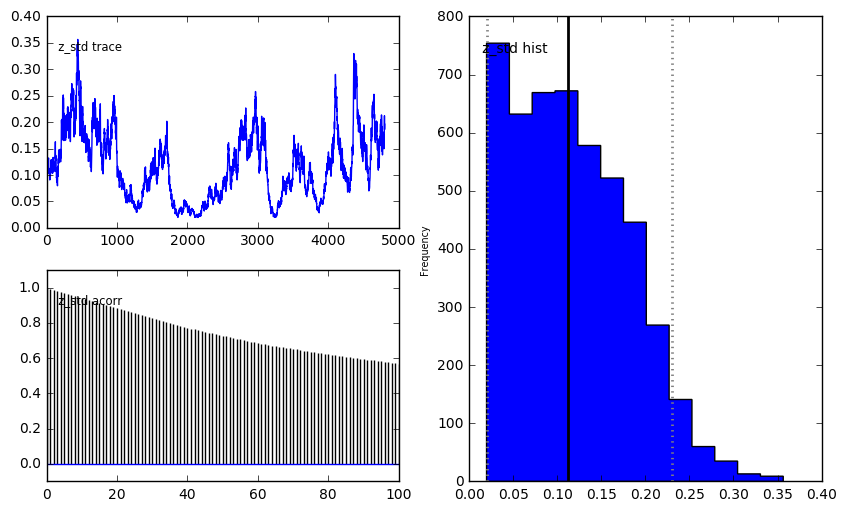

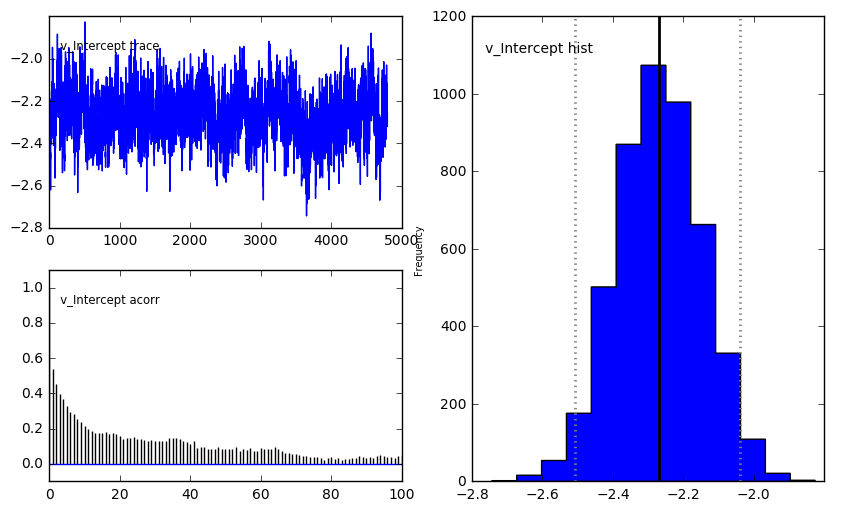

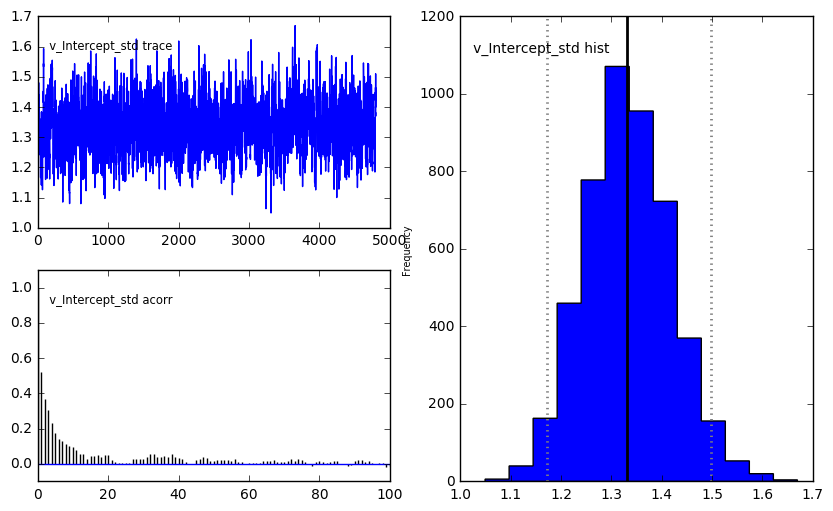

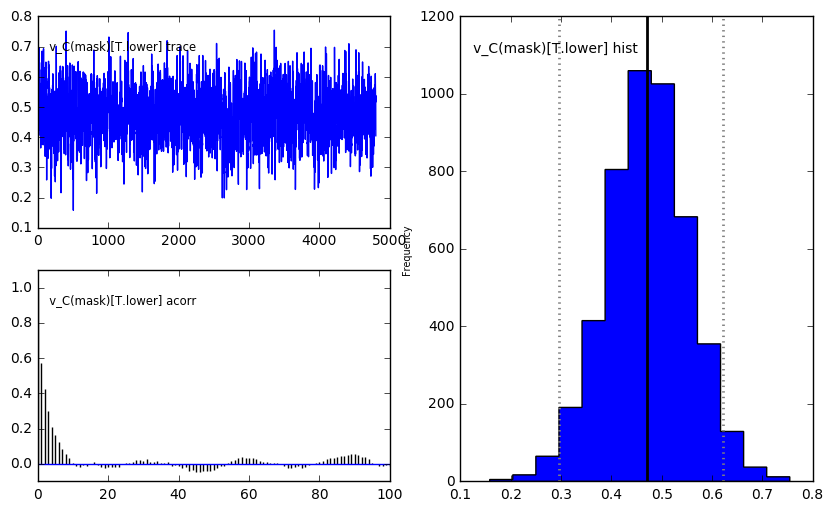

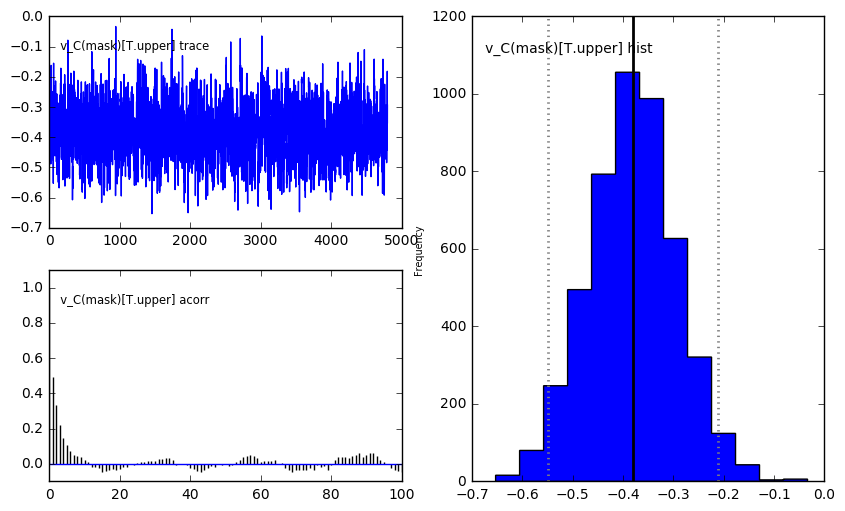

In [47]:
# save model stats
ra_stats = m_ra.gen_stats()
print(ra_stats)
ra_stats.to_csv('ra_5000/faceMask_hddm_drift_maskFalsePositives_ra_5000.csv', index=True)

# save model posterior plots
m_ra.plot_posteriors(path='ra_5000/_posteriors', save=True)

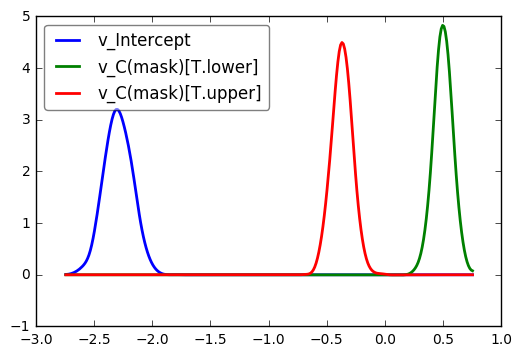

In [48]:
# plot model posteriors by mask
ra_v_none, ra_v_lower, ra_v_upper = m_ra.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ra_v_none, ra_v_lower, ra_v_upper])
plt.savefig('ra_5000/faceMask_hddm_drift_maskFalsePositives_ra_5000_v_mask.pdf')

In [49]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ra_v_none < 0) = ", (ra_v_none.trace() < 0).mean())
print("P(ra_v_lower < 0) = ", (ra_v_lower.trace() < 0).mean())
print("P(ra_v_upper > 0) = ", (ra_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ra_v_lower < ra_v_upper) = ", (ra_v_lower.trace() < ra_v_upper.trace()).mean())

P(ra_v_none < 0) =  1.0
P(ra_v_lower < 0) =  0.0
P(ra_v_upper > 0) =  0.0
P(ra_v_lower < ra_v_upper) =  0.0


In [17]:
# subset dataset by emotion rating type (surprised) and facial expression (disgusted)
rd_data = data.loc[(data['emotionRating'] == 'surprised') & (data['expression'] == 'disgusted')]
rd_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
4    lbmmswtrr0mpvov      0         3     surprised      4   
7    lbmmswtrr0mpvov      0         3     surprised      7   
12   lbmmswtrr0mpvov      0         3     surprised     12   
22   lbmmswtrr0mpvov      0         3     surprised     22   
24   lbmmswtrr0mpvov      0         3     surprised     24   
25   lbmmswtrr0mpvov      0         3     surprised     25   
26   lbmmswtrr0mpvov      0         3     surprised     26   
49   lbmmswtrr0mpvov      0         3     surprised     49   
53   lbmmswtrr0mpvov      0         3     surprised     53   
598  mr81dhy9r5lxu8r      5         2     surprised    279   

                stimulus      face model ethnicity sex expression      mask  \
4    _faces/BF10_D_X.jpg  BF10_D_X  BF10         B   F  disgusted  baseline   
7    _faces/BF10_D_L.jpg  BF10_D_L  BF10         B   F  disgusted     lower   
12   _faces/WM13_D_U.jpg  WM13_D_U  WM13         W   M  disgusted     upper   
22   _faces/WM13_D_L.jpg  WM13_D_L  WM13         W   M  disgusted     lower   
24   _faces/WM13_D_X.jpg  WM13_D_X  WM13         W   M  disgusted  baseline   
25   _faces/HF09_D_X.jpg  HF09_D_X  HF09         H   F  disgusted  baseline   
26   _faces/HF09_D_L.jpg  HF09_D_L  HF09         H   F  disgusted     lower   
49   _faces/HF09_D_U.jpg  HF09_D_U  HF09         H   F  disgusted     upper   
53   _faces/BF10_D_U.jpg  BF10_D_U  BF10         B   F  disgusted     upper   
598  _faces/BF15_D_U.jpg  BF15_D_U  BF15         B   F  disgusted     upper   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
4           0 -1.586875          0            100            0          0   
7           0 -1.574250          0             50            0          0   
12          0 -1.047160          0             50            0          0   
22          0 -1.317435          0             50            0          0   
24          0 -0.849315          0            100            0          0   
25          0 -0.854760          0            100            0          0   
26          0 -0.747255          0             50            0          0   
49          0 -0.706735          0             50            0          0   
53          0 -3.435460          0             50            0          0   
598         0 -1.920000          0             50            0          0   

     faceSad  faceSurprised  
4          0              0  
7          0              0  
12         0              0  
22         0              0  
24         0              0  
25         0              0  
26         0              0  
49         0              0  
53         0              0  
598        0              0

In [18]:
# drop any subjects missing columns in design matrix (otherwise produces error) 
rd_data = rd_data[(rd_data.subj_idx != 'dqph4ch0mkofejw') & (rd_data.subj_idx != 'me8doxrmo9vj9dx') & (rd_data.subj_idx != 'n1w02b847xslowd')]

In [19]:
# define model
m_rd = hddm.HDDMRegressor(rd_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 42867.0 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std        2.5q         25q        50q         75q       97.5q       mc err
a                                   1.65962  0.0380781     1.58919     1.63329    1.65884     1.68488     1.73954   0.00132839
a_std                              0.429823  0.0364379     0.36048    0.405594   0.428548    0.454007    0.502917   0.00164622
a_subj.09coqg8hlpux6fe              1.35198   0.209623    0.996548      1.1991    1.33208     1.48571     1.80732   0.00474658
a_subj.0b3t2skj9mlhbkn              1.56766    0.25285     1.14224     1.38516    1.54769     1.72577     2.12237    0.0056125
a_subj.0bcg7mtj2n1jjw9              2.69034   0.347996     2.09834     2.44537    2.66014     2.90624     3.43488   0.00701768
a_subj.0s53r30oouek89b              2.24189   0.398179     1.60747     1.95265    2.19846      2.4731     3.14777   0.00884783
a_subj.0uj9gbhag3o1w1v              1.80081   0.286318     1.32363     1.59593    1.77095     1.96977     2.432

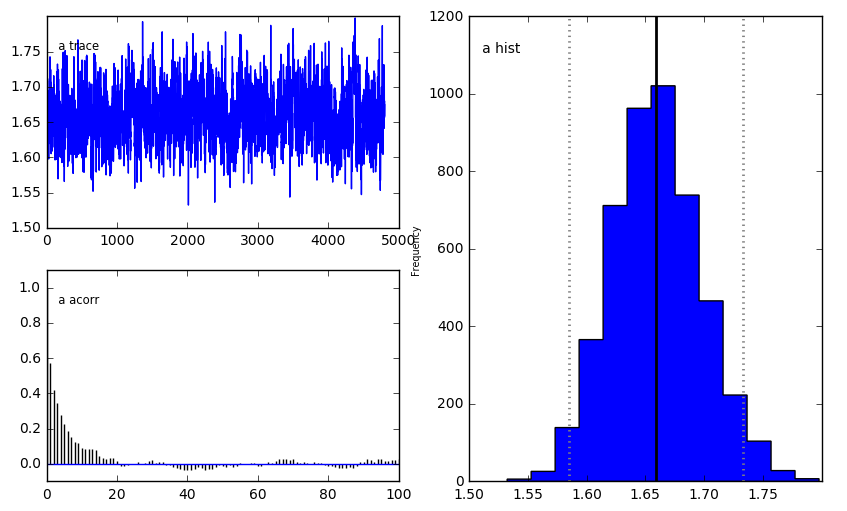

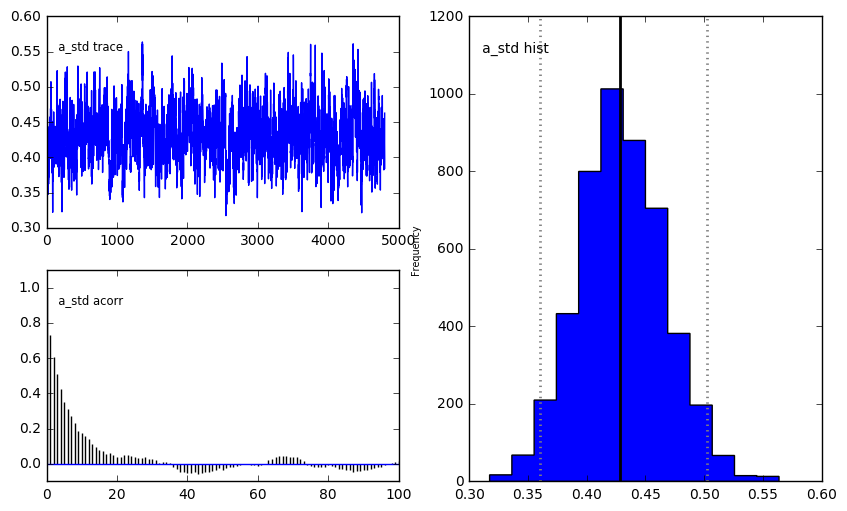

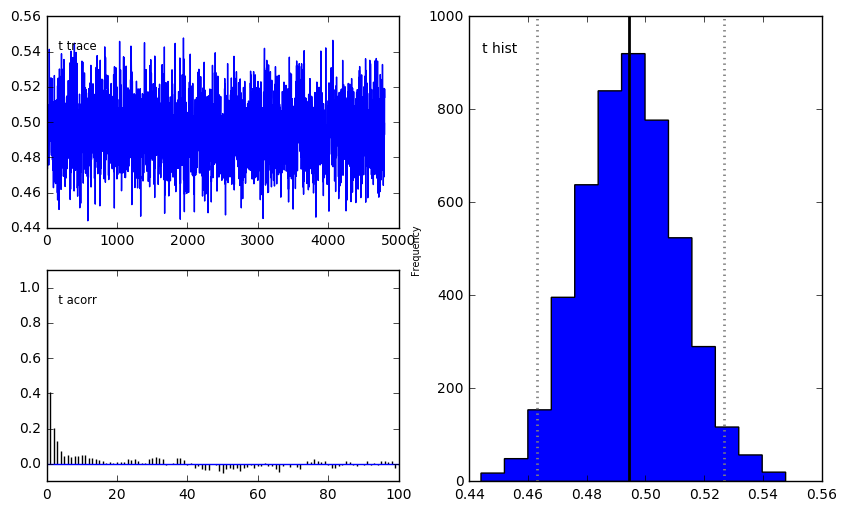

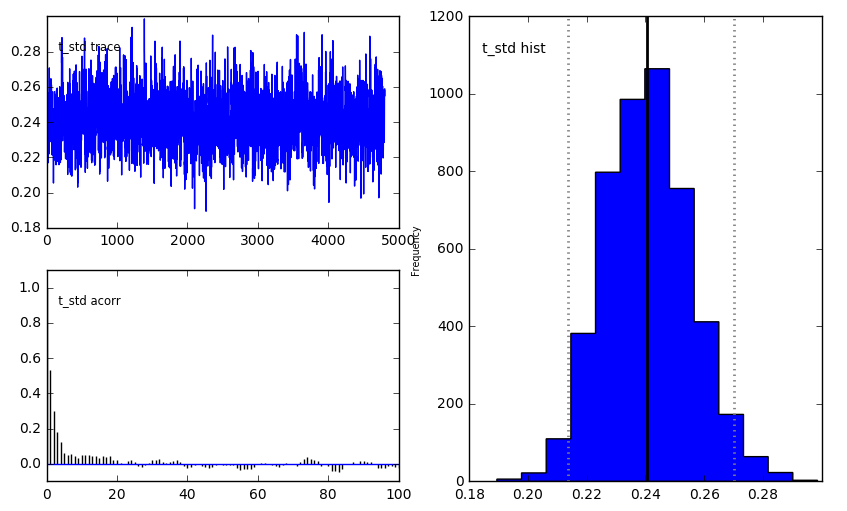

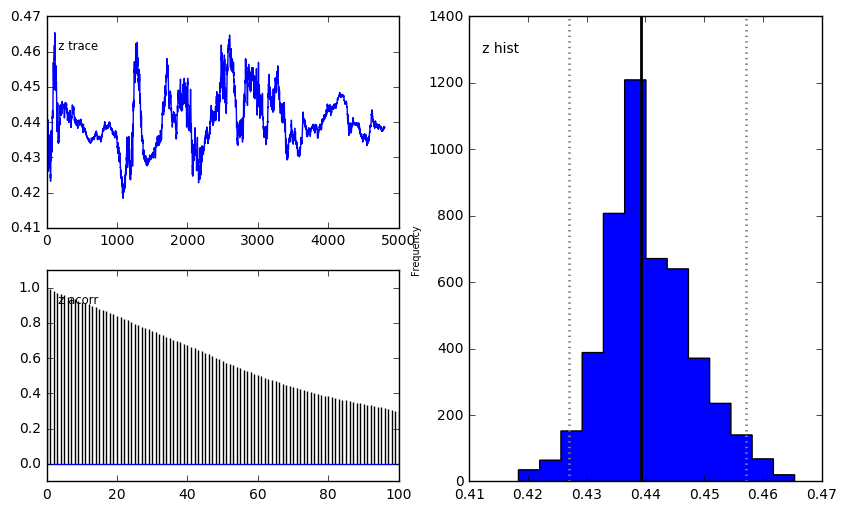

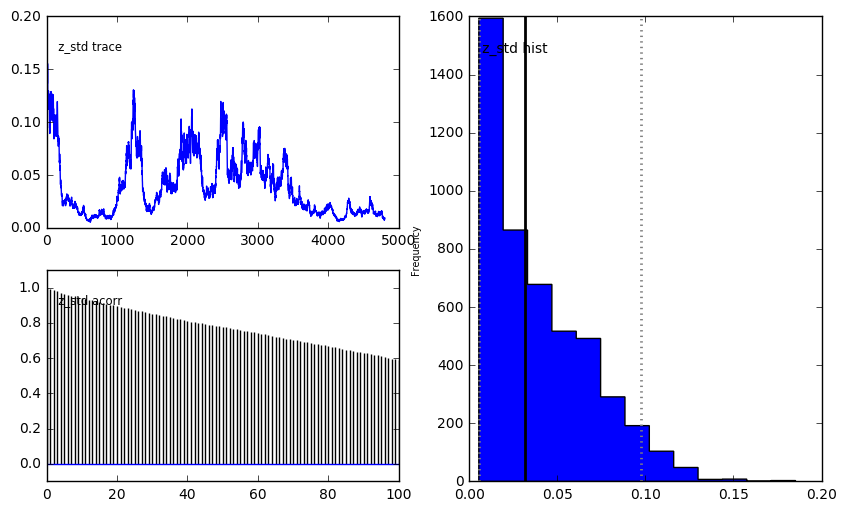

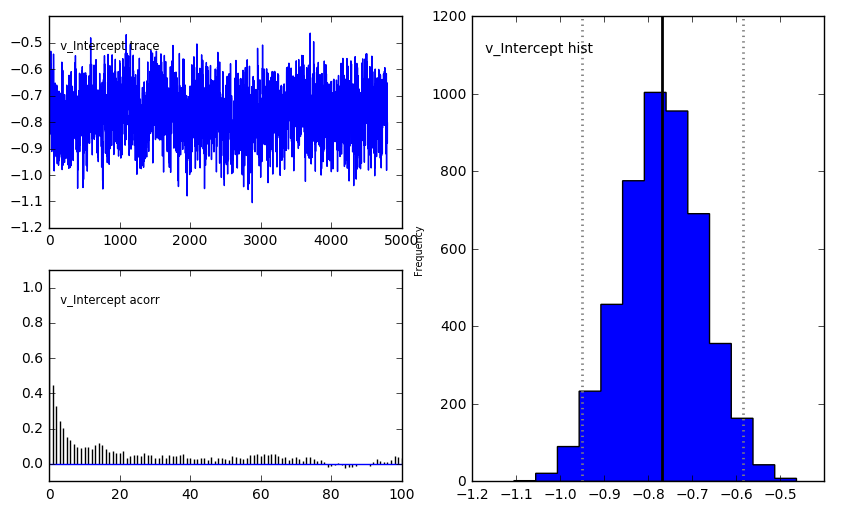

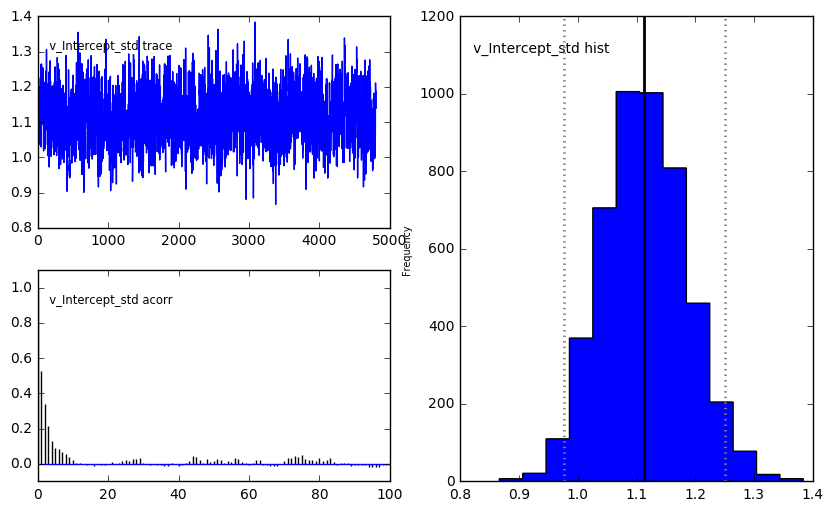

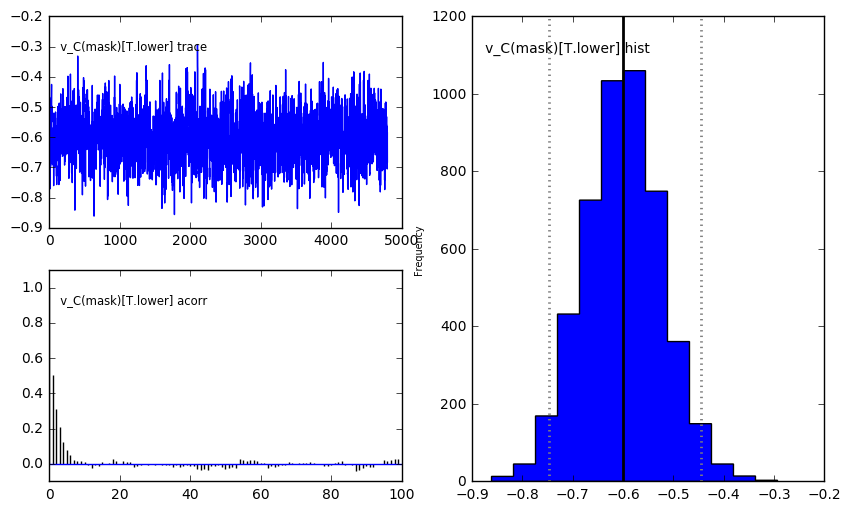

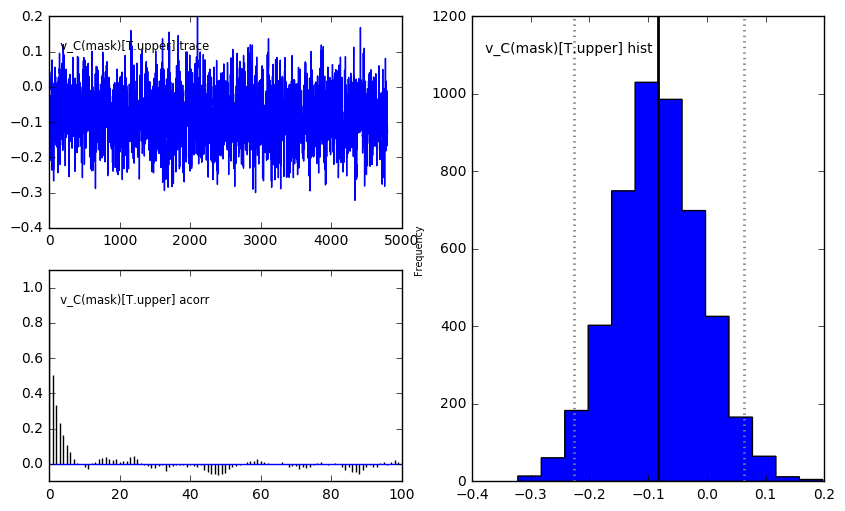

In [20]:
# run model
m_rd.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_rd.print_stats()
m_rd.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q  \
a                                   1.65962  0.0380781    1.58919    1.63329   
a_std                              0.429823  0.0364379    0.36048   0.405594   
a_subj.09coqg8hlpux6fe              1.35198   0.209623   0.996548     1.1991   
a_subj.0b3t2skj9mlhbkn              1.56766    0.25285    1.14224    1.38516   
a_subj.0bcg7mtj2n1jjw9              2.69034   0.347996    2.09834    2.44537   
a_subj.0s53r30oouek89b              2.24189   0.398179    1.60747    1.95265   
a_subj.0uj9gbhag3o1w1v              1.80081   0.286318    1.32363    1.59593   
a_subj.17nzn4k8r1qkmrn               1.8313   0.384315    1.21256    1.55245   
a_subj.1fdkw2qjx3hc3lk              1.54875   0.267602    1.09707    1.35691   
a_subj.1mla0dmotqefnav              1.93476   0.287881    1.44692    1.72975   
a_subj.23hr9tl84h3zhw3              2.21061   0.272972    1.72295    2.01549   
a_subj.27muqwvalwne26r              1.83

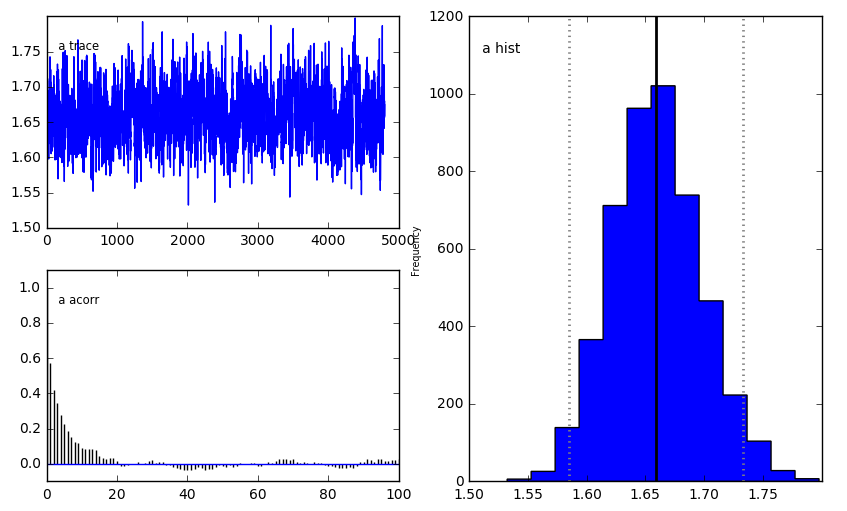

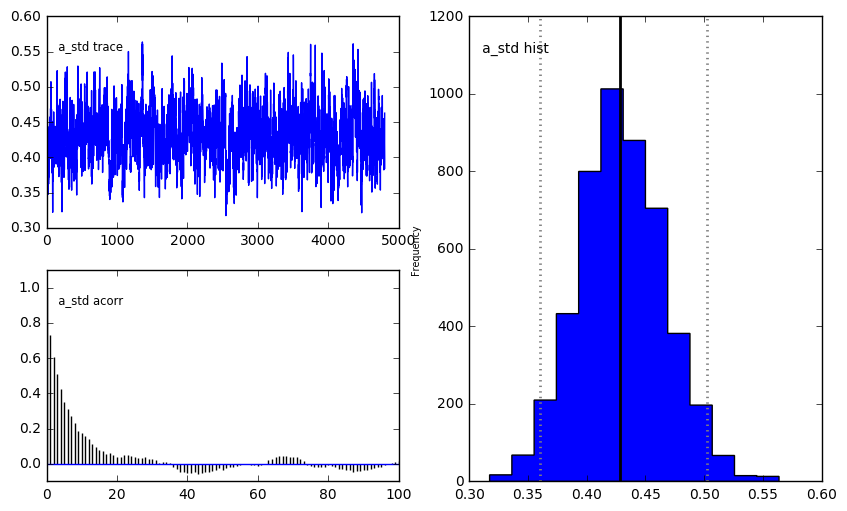

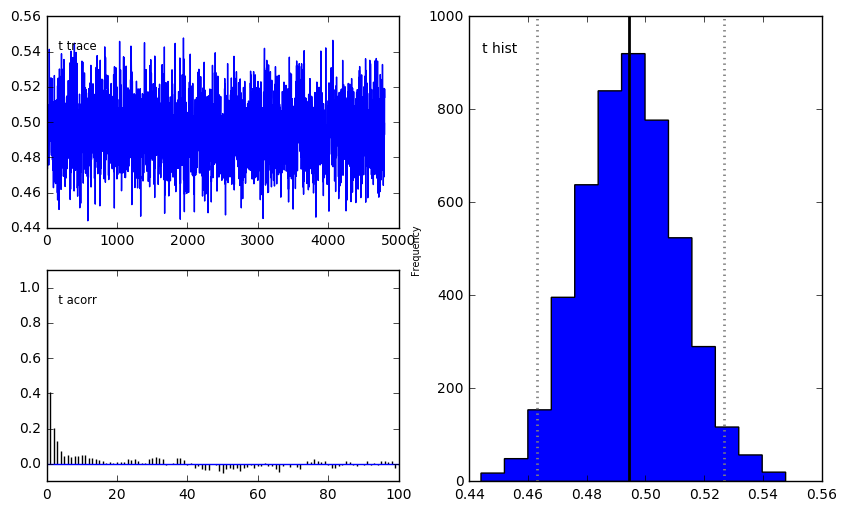

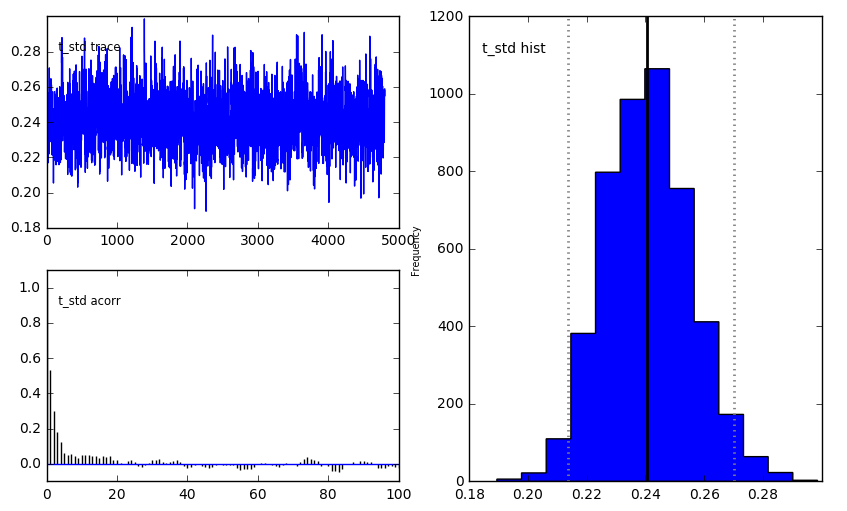

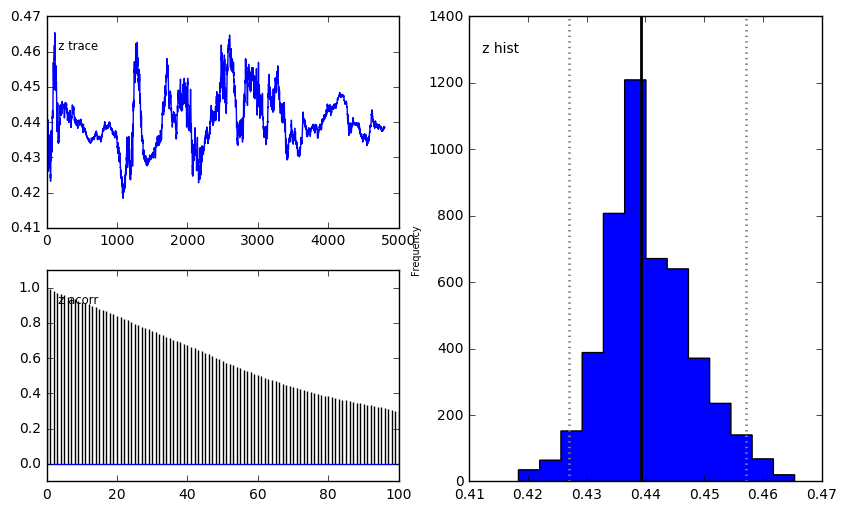

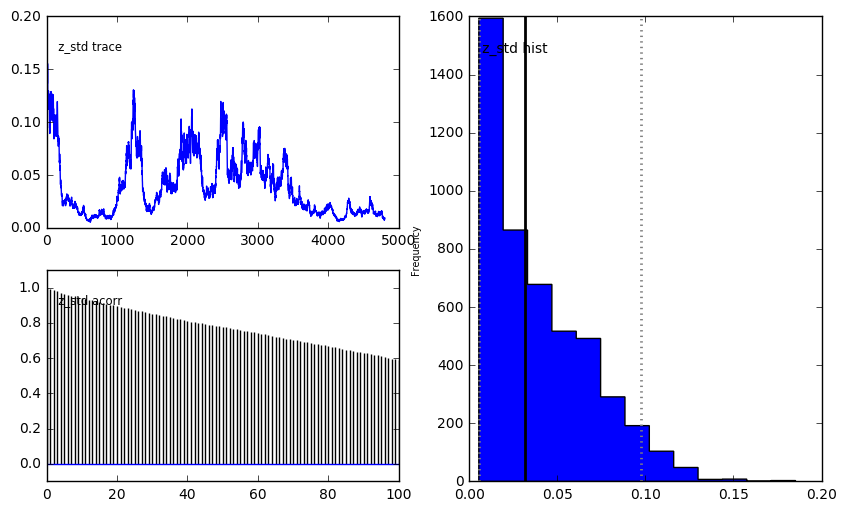

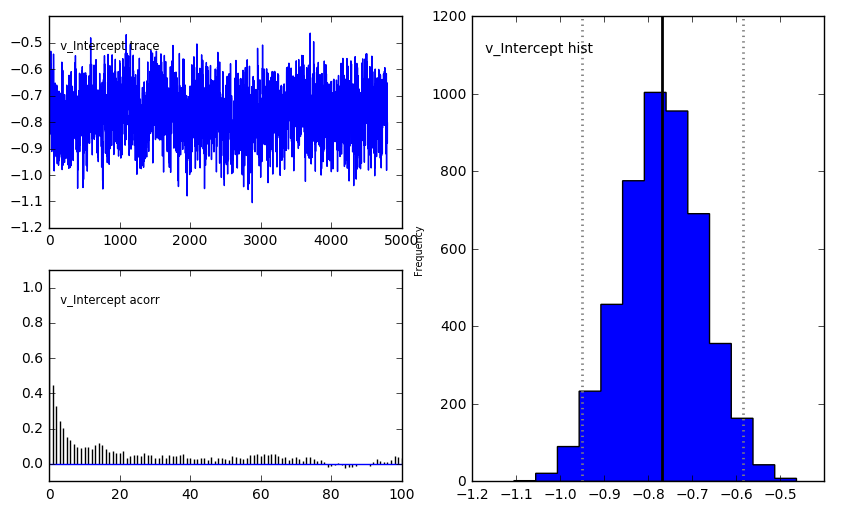

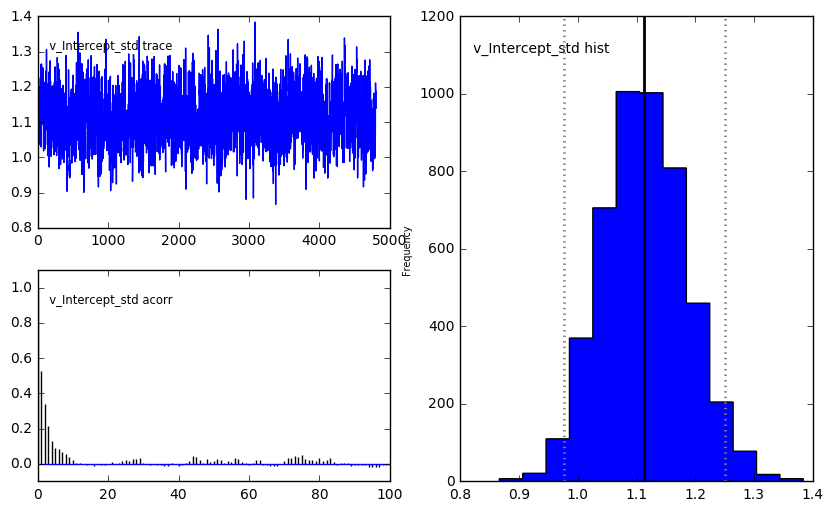

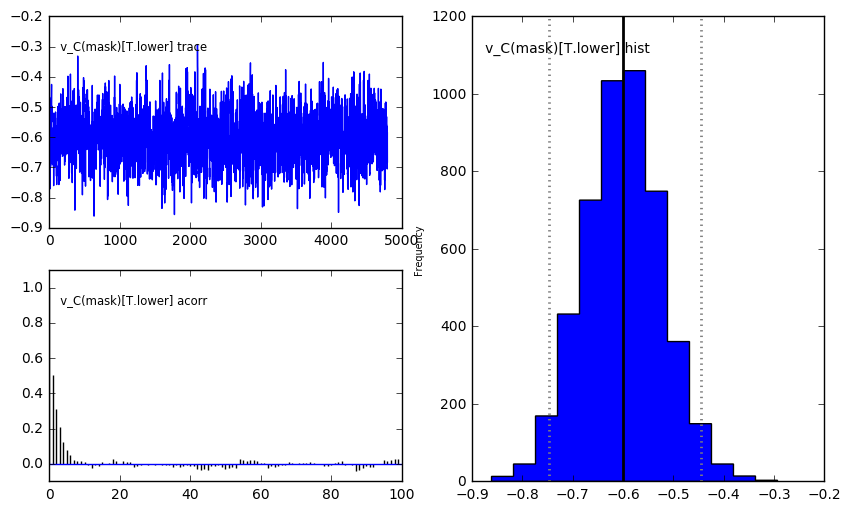

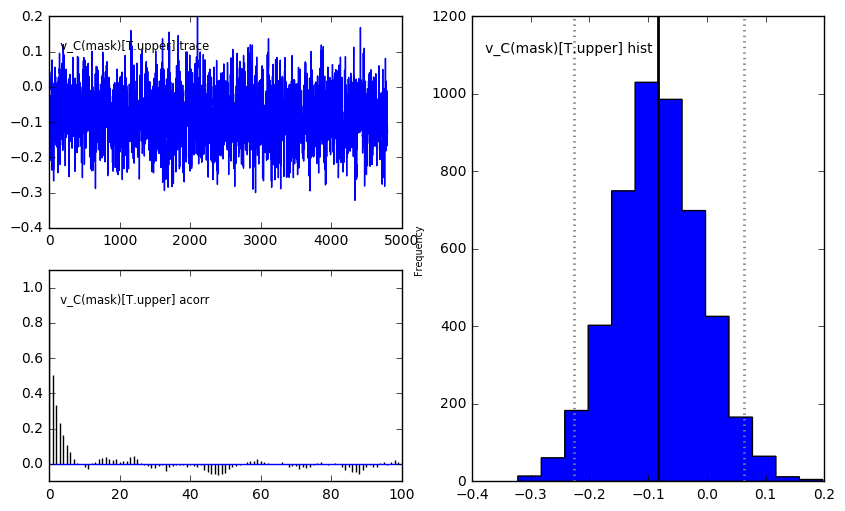

In [21]:
# save model stats
rd_stats = m_rd.gen_stats()
print(rd_stats)
rd_stats.to_csv('rd_5000/faceMask_hddm_drift_maskFalsePositives_rd_5000.csv', index=True)

# save model posterior plots
m_rd.plot_posteriors(path='rd_5000/_posteriors', save=True)

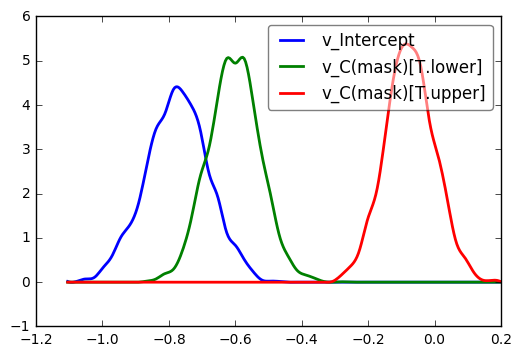

In [23]:
# plot model posteriors by mask
rd_v_none, rd_v_lower, rd_v_upper = m_rd.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([rd_v_none, rd_v_lower, rd_v_upper])
plt.savefig('rd_5000/faceMask_hddm_drift_maskFalsePositives_rd_5000_v_mask.pdf')

In [24]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(rd_v_none < 0) = ", (rd_v_none.trace() < 0).mean())
print("P(rd_v_lower < 0) = ", (rd_v_lower.trace() < 0).mean())
print("P(rd_v_upper > 0) = ", (rd_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(rd_v_lower < rd_v_upper) = ", (rd_v_lower.trace() < rd_v_upper.trace()).mean())

P(rd_v_none < 0) =  1.0
P(rd_v_lower < 0) =  1.0
P(rd_v_upper > 0) =  0.134375
P(rd_v_lower < rd_v_upper) =  1.0


In [25]:
# subset dataset by emotion rating type (surprised) and facial expression (fearful)
rf_data = data.loc[(data['emotionRating'] == 'surprised') & (data['expression'] == 'fearful')]
rf_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
0    lbmmswtrr0mpvov      0         3     surprised      0   
5    lbmmswtrr0mpvov      0         3     surprised      5   
10   lbmmswtrr0mpvov      0         3     surprised     10   
30   lbmmswtrr0mpvov      0         3     surprised     30   
34   lbmmswtrr0mpvov      0         3     surprised     34   
41   lbmmswtrr0mpvov      0         3     surprised     41   
42   lbmmswtrr0mpvov      0         3     surprised     42   
48   lbmmswtrr0mpvov      0         3     surprised     48   
52   lbmmswtrr0mpvov      0         3     surprised     52   
593  mr81dhy9r5lxu8r      5         2     surprised    274   

                stimulus      face model ethnicity sex expression      mask  \
0    _faces/HM08_F_X.jpg  HM08_F_X  HM08         H   M    fearful  baseline   
5    _faces/BF15_F_L.jpg  BF15_F_L  BF15         B   F    fearful     lower   
10   _faces/HM08_F_L.jpg  HM08_F_L  HM08         H   M    fearful     lower   
30   _faces/HM08_F_U.jpg  HM08_F_U  HM08         H   M    fearful     upper   
34   _faces/BF15_F_U.jpg  BF15_F_U  BF15         B   F    fearful     upper   
41   _faces/BF15_F_X.jpg  BF15_F_X  BF15         B   F    fearful  baseline   
42   _faces/AF06_F_X.jpg  AF06_F_X  AF06         A   F    fearful  baseline   
48   _faces/AF06_F_U.jpg  AF06_F_U  AF06         A   F    fearful     upper   
52   _faces/AF06_F_L.jpg  AF06_F_L  AF06         A   F    fearful     lower   
593  _faces/AF09_F_L.jpg  AF09_F_L  AF09         A   F    fearful     lower   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
0           1  2.248290          0              0          100          0   
5           1  1.020070          0              0           50          0   
10          1  1.066490          0              0           50          0   
30          1  2.021485          0              0           50          0   
34          0 -0.661000          0              0           50          0   
41          0 -0.836680          0              0          100          0   
42          0 -0.834300          0              0          100          0   
48          0 -2.199715          0              0           50          0   
52          1  0.868595          0              0           50          0   
593         1  1.570000          0              0           50          0   

     faceSad  faceSurprised  
0          0              0  
5          0              0  
10         0              0  
30         0              0  
34         0              0  
41         0              0  
42         0              0  
48         0              0  
52         0              0  
593        0              0

In [26]:
# drop any subjects missing columns in design matrix (otherwise produces error)
rf_data = rf_data[(rf_data.subj_idx != 'dqph4ch0mkofejw') & (rf_data.subj_idx != 'hdn2l3df216jykn') & (rf_data.subj_idx !='xs5439nm2v85thb')]

In [27]:
# define model
m_rf = hddm.HDDMRegressor(rf_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 38066.9 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std        2.5q         25q         50q         75q       97.5q       mc err
a                                    1.55781   0.0337182     1.49439     1.53486      1.5564     1.58027     1.62683  0.000971114
a_std                               0.437895   0.0307573    0.380691     0.41696    0.436925    0.457441    0.502242   0.00100939
a_subj.09coqg8hlpux6fe               1.44168    0.225202     1.06276     1.28002     1.42111     1.57785      1.9432   0.00515784
a_subj.0b3t2skj9mlhbkn               1.37467    0.227436     1.00615     1.21149     1.35059     1.51122     1.89545   0.00523662
a_subj.0bcg7mtj2n1jjw9               2.56712    0.382283     1.89048     2.29624     2.54162     2.80407     3.38964   0.00900166
a_subj.0s53r30oouek89b               2.56922    0.356807     1.94686     2.31484     2.54548     2.79604     3.33633   0.00809663
a_subj.0uj9gbhag3o1w1v               1.78437    0.274923     1.33189     1.58915     1.756

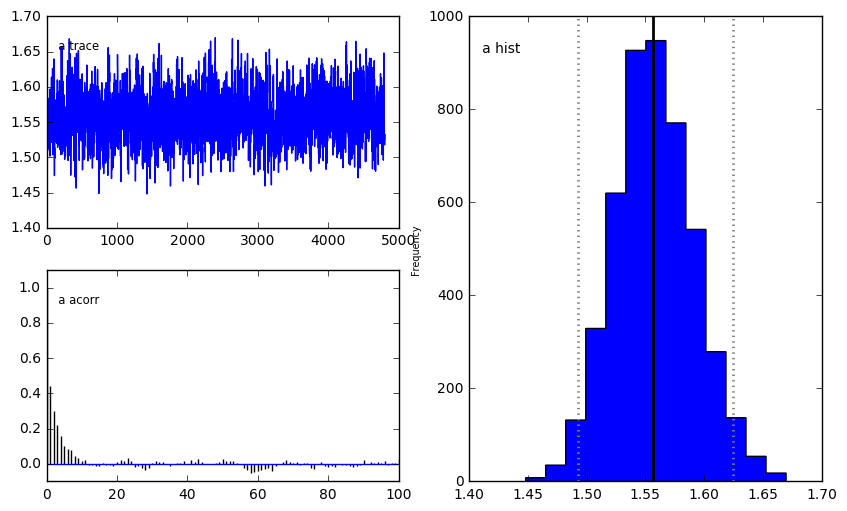

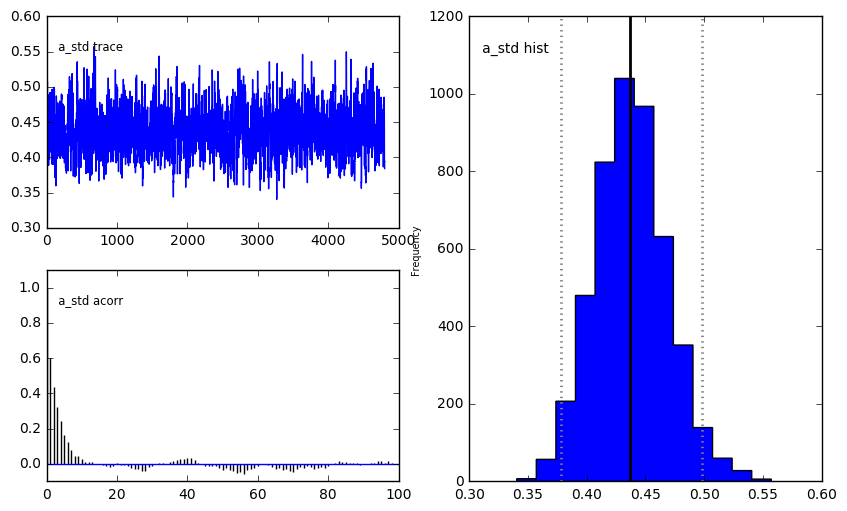

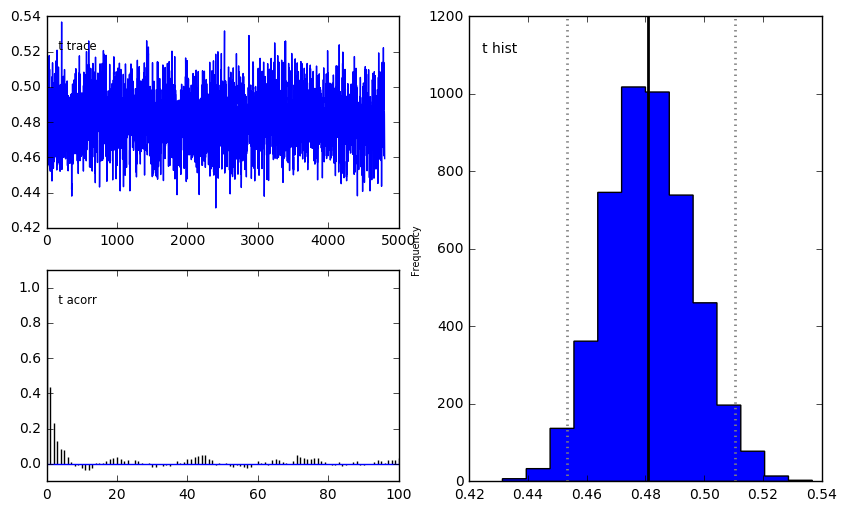

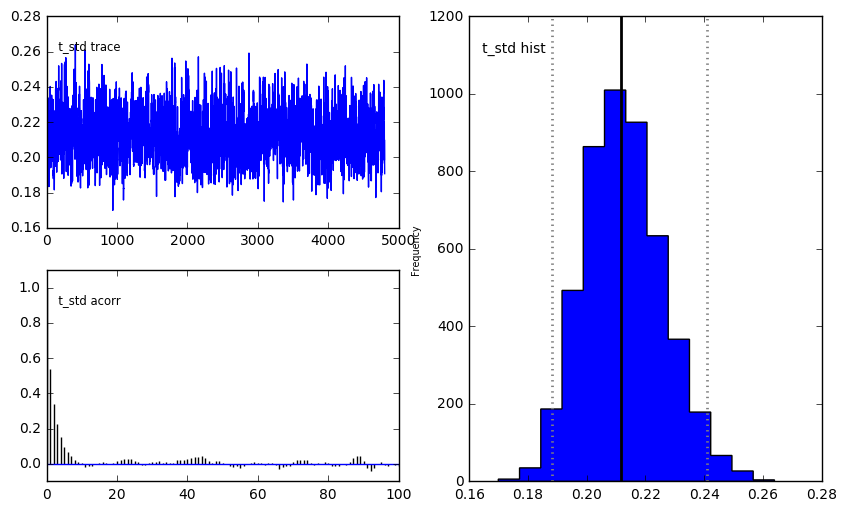

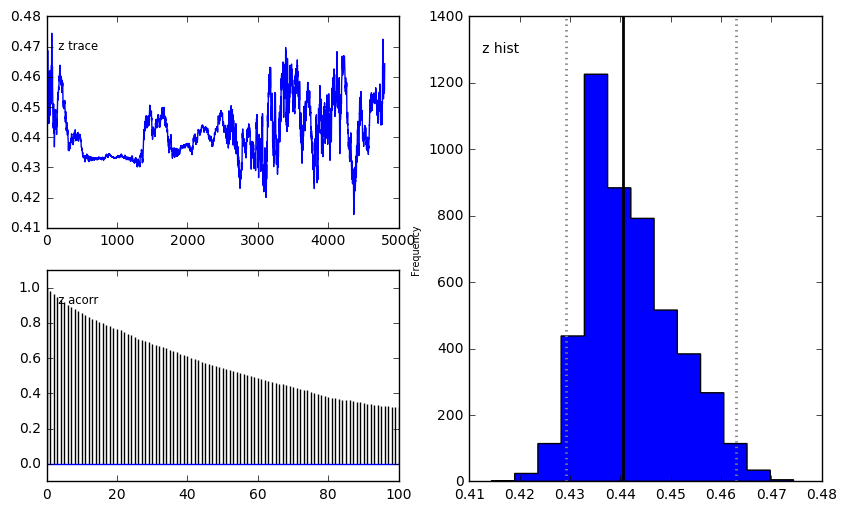

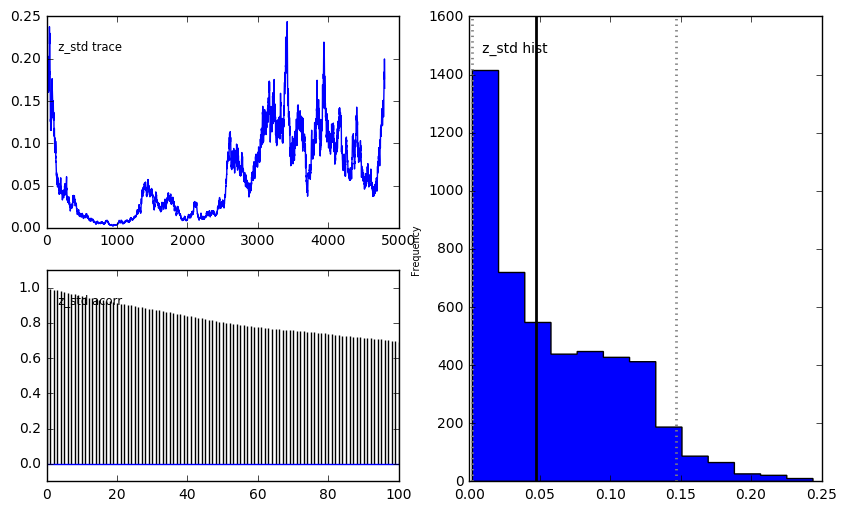

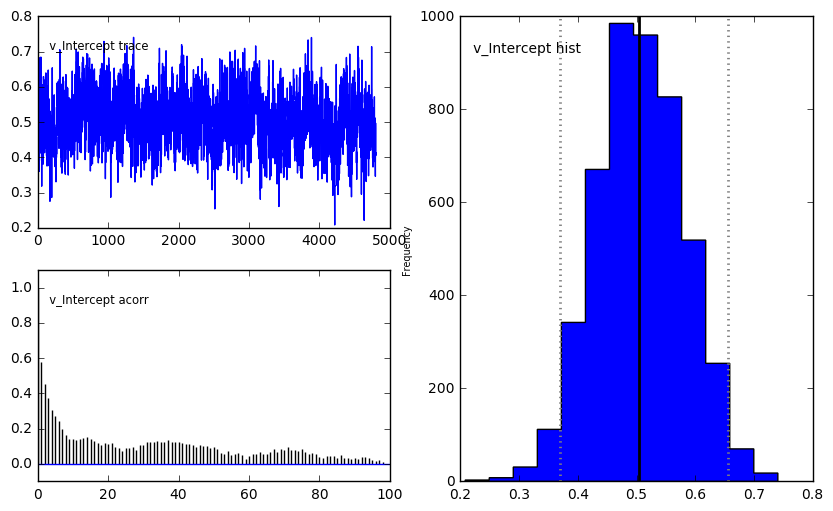

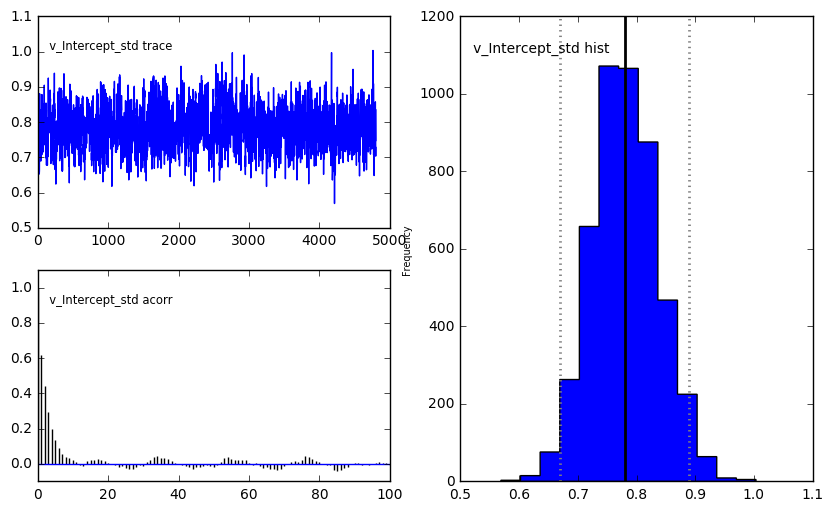

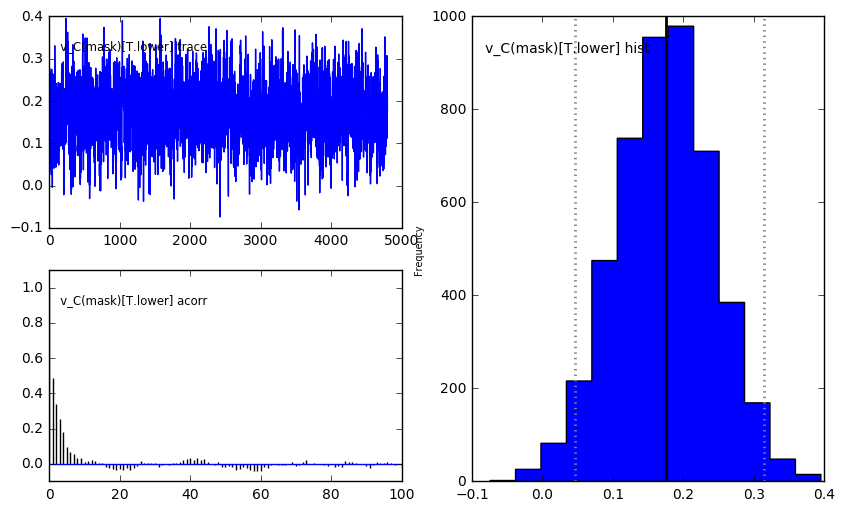

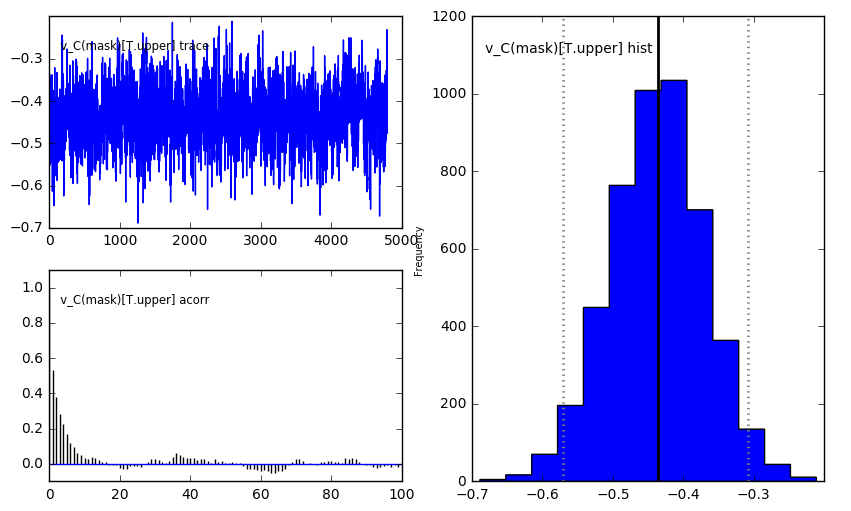

In [28]:
# run model
m_rf.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_rf.print_stats()
m_rf.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q  \
a                                   1.55781  0.0337182    1.49439    1.53486   
a_std                              0.437895  0.0307573   0.380691    0.41696   
a_subj.09coqg8hlpux6fe              1.44168   0.225202    1.06276    1.28002   
a_subj.0b3t2skj9mlhbkn              1.37467   0.227436    1.00615    1.21149   
a_subj.0bcg7mtj2n1jjw9              2.56712   0.382283    1.89048    2.29624   
a_subj.0s53r30oouek89b              2.56922   0.356807    1.94686    2.31484   
a_subj.0uj9gbhag3o1w1v              1.78437   0.274923    1.33189    1.58915   
a_subj.17nzn4k8r1qkmrn              1.69473   0.269061    1.24807    1.49923   
a_subj.1fdkw2qjx3hc3lk              1.39112   0.212339    1.03264    1.23494   
a_subj.1mla0dmotqefnav              1.69072   0.238332    1.28419    1.51894   
a_subj.23hr9tl84h3zhw3              2.08323   0.306716    1.56764    1.85719   
a_subj.27muqwvalwne26r              1.84

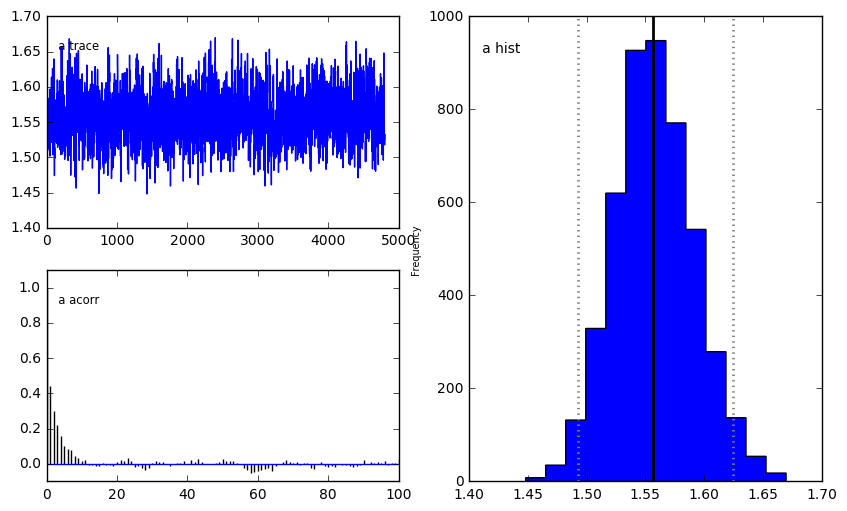

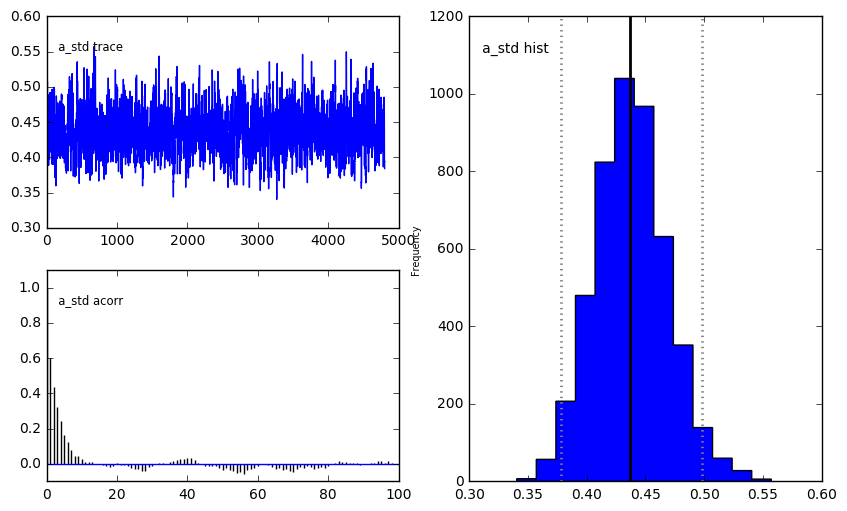

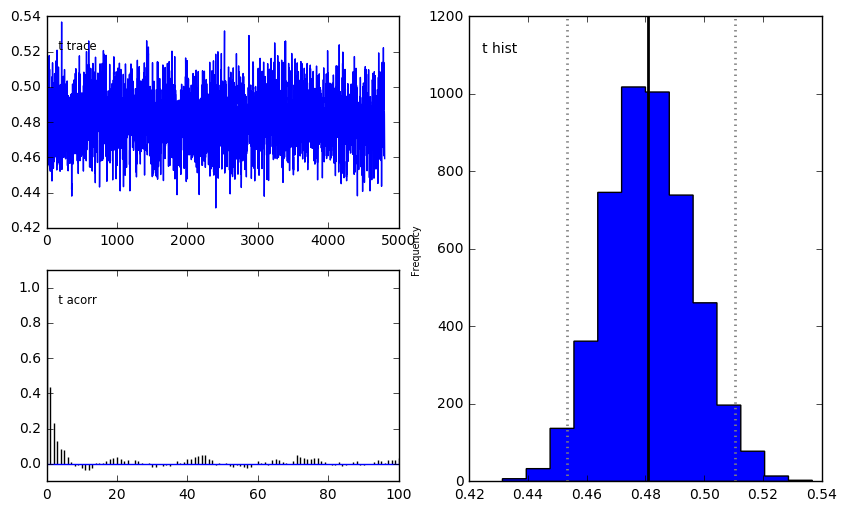

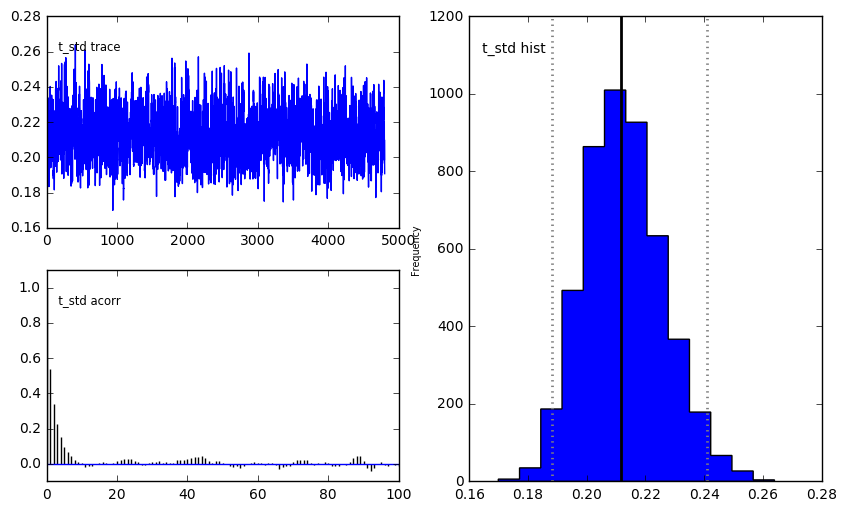

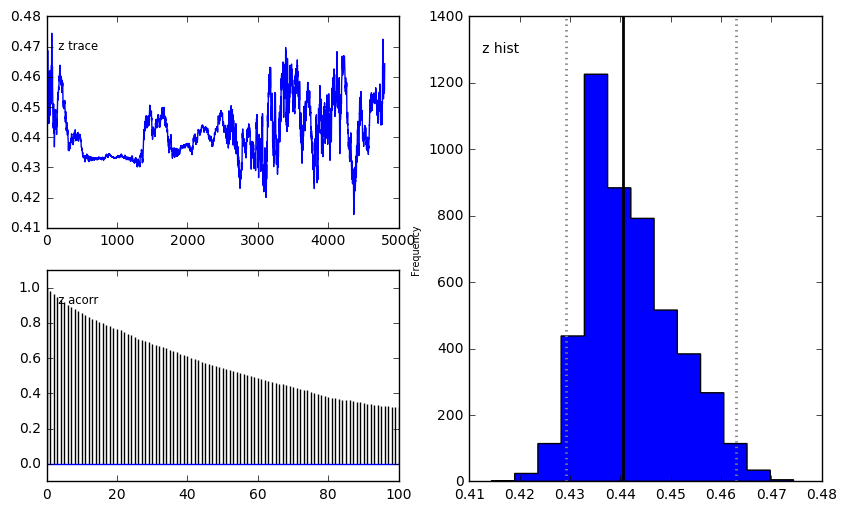

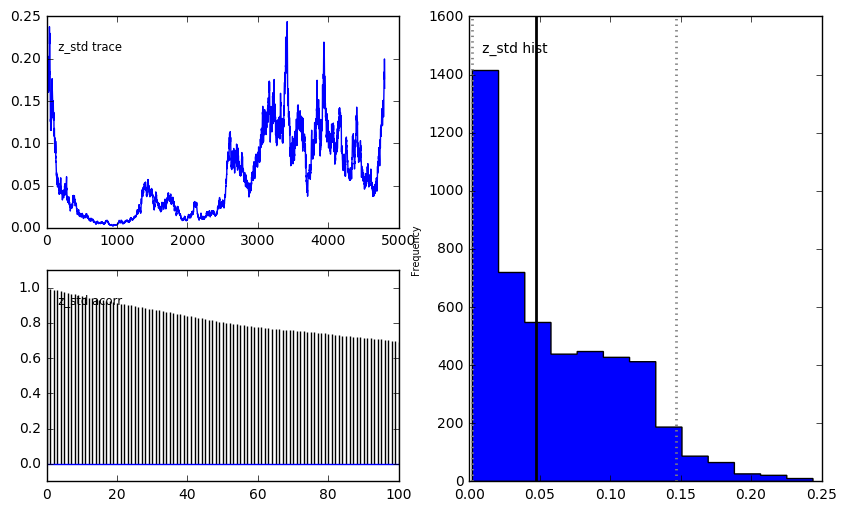

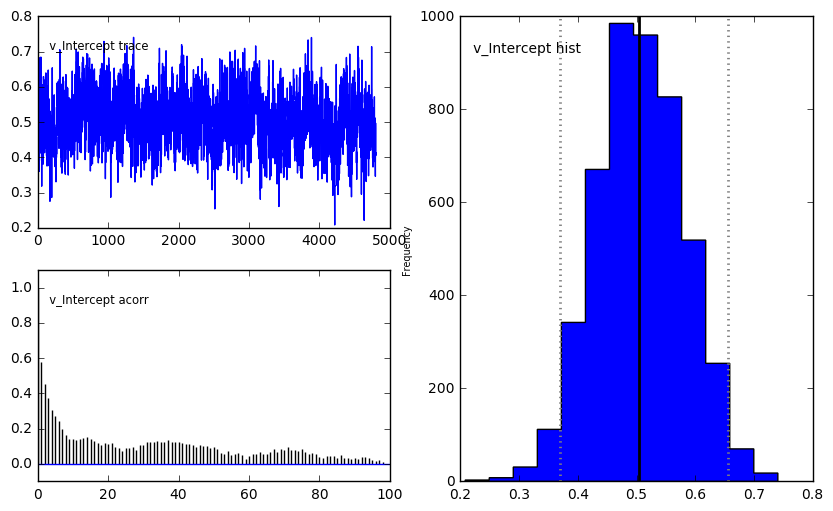

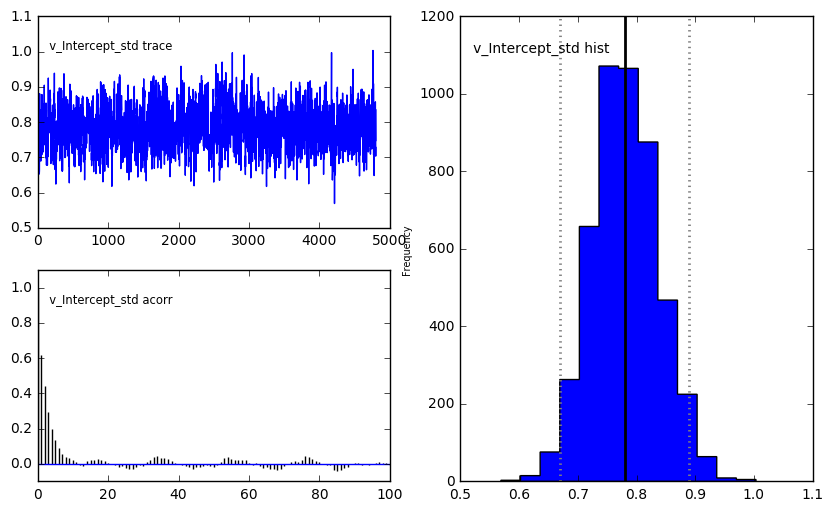

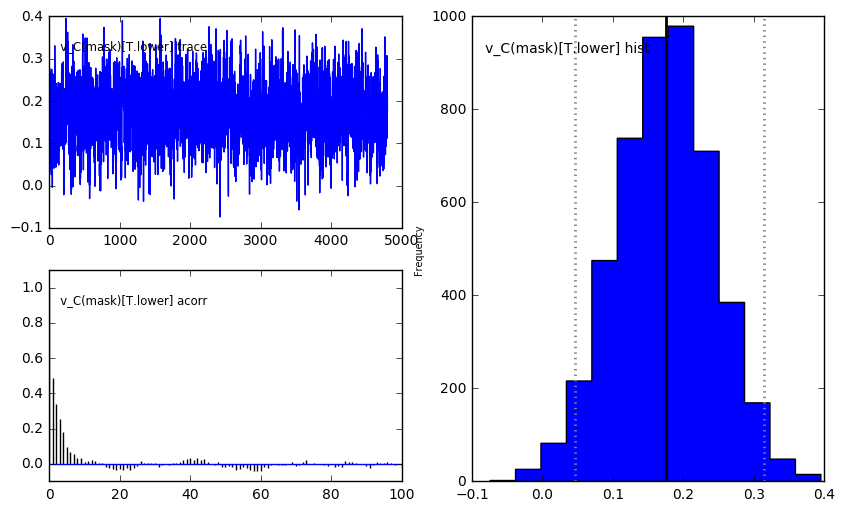

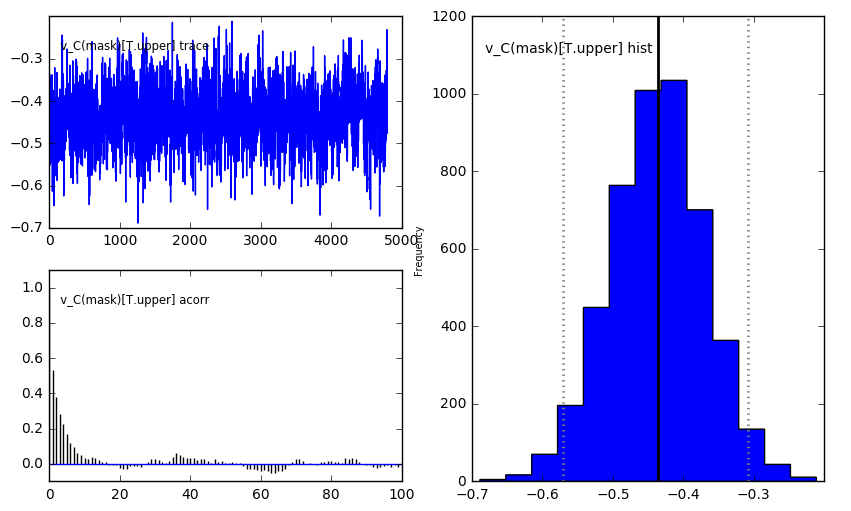

In [29]:
# save model stats
rf_stats = m_rf.gen_stats()
print(rf_stats)
rf_stats.to_csv('rf_5000/faceMask_hddm_drift_maskFalsePositives_rf_5000.csv', index=True)

# save model posterior plots
m_rf.plot_posteriors(path='rf_5000/_posteriors', save=True)

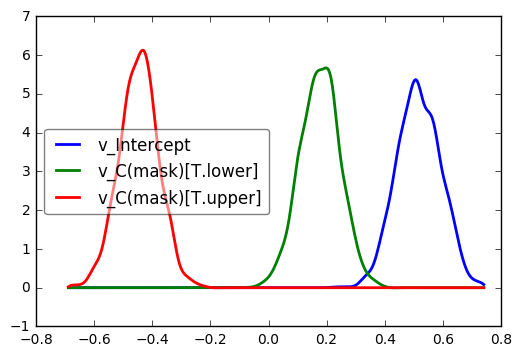

In [30]:
# plot model posteriors by mask
rf_v_none, rf_v_lower, rf_v_upper = m_rf.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([rf_v_none, rf_v_lower, rf_v_upper])
plt.savefig('rf_5000/faceMask_hddm_drift_maskFalsePositives_rf_5000_v_mask.pdf')

In [31]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(rf_v_none < 0) = ", (rf_v_none.trace() < 0).mean())
print("P(rf_v_lower < 0) = ", (rf_v_lower.trace() < 0).mean())
print("P(rf_v_upper > 0) = ", (rf_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(rf_v_lower < rf_v_upper) = ", (rf_v_lower.trace() < rf_v_upper.trace()).mean())

P(rf_v_none < 0) =  0.0
P(rf_v_lower < 0) =  0.00625
P(rf_v_upper > 0) =  0.0
P(rf_v_lower < rf_v_upper) =  0.0


In [32]:
# subset dataset by emotion rating type (surprised) and facial expression (sad)
rs_data = data.loc[(data['emotionRating'] == 'surprised') & (data['expression'] == 'sad')]
rs_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
2    lbmmswtrr0mpvov      0         3     surprised      2   
6    lbmmswtrr0mpvov      0         3     surprised      6   
8    lbmmswtrr0mpvov      0         3     surprised      8   
14   lbmmswtrr0mpvov      0         3     surprised     14   
17   lbmmswtrr0mpvov      0         3     surprised     17   
28   lbmmswtrr0mpvov      0         3     surprised     28   
39   lbmmswtrr0mpvov      0         3     surprised     39   
46   lbmmswtrr0mpvov      0         3     surprised     46   
50   lbmmswtrr0mpvov      0         3     surprised     50   
592  mr81dhy9r5lxu8r      5         2     surprised    273   

                stimulus      face model ethnicity sex expression      mask  \
2    _faces/WF05_S_X.jpg  WF05_S_X  WF05         W   F        sad  baseline   
6    _faces/AM07_S_X.jpg  AM07_S_X  AM07         A   M        sad  baseline   
8    _faces/AM07_S_U.jpg  AM07_S_U  AM07         A   M        sad     upper   
14   _faces/WF05_S_U.jpg  WF05_S_U  WF05         W   F        sad     upper   
17   _faces/HF04_S_U.jpg  HF04_S_U  HF04         H   F        sad     upper   
28   _faces/HF04_S_L.jpg  HF04_S_L  HF04         H   F        sad     lower   
39   _faces/AM07_S_L.jpg  AM07_S_L  AM07         A   M        sad     lower   
46   _faces/HF04_S_X.jpg  HF04_S_X  HF04         H   F        sad  baseline   
50   _faces/WF05_S_L.jpg  WF05_S_L  WF05         W   F        sad     lower   
592  _faces/HF05_S_U.jpg  HF05_S_U  HF05         H   F        sad     upper   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
2           0 -1.093135          0              0            0          0   
6           0 -1.092280          0              0            0          0   
8           0 -1.219265          0              0            0          0   
14          0 -0.890885          0              0            0          0   
17          0 -1.395115          0              0            0          0   
28          0 -0.858535          0              0            0          0   
39          0 -0.682930          0              0            0          0   
46          0 -0.605645          0              0            0          0   
50          0 -0.906955          0              0            0          0   
592         0 -2.255000          0              0            0          0   

     faceSad  faceSurprised  
2        100              0  
6        100              0  
8         50              0  
14        50              0  
17        50              0  
28        50              0  
39        50              0  
46       100              0  
50        50              0  
592       50              0

In [33]:
# drop any subjects missing columns in design matrix (otherwise produces error)
rs_data = rs_data[(rs_data.subj_idx != 'me8doxrmo9vj9dx') & (rs_data.subj_idx != 'n1w02b847xslowd')]

In [34]:
# define model
m_rs = hddm.HDDMRegressor(rs_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 39849.5 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q         50q        75q      97.5q       mc err
a                                   1.87722   0.065188    1.75891    1.83182     1.87476    1.91954     2.0111   0.00390458
a_std                              0.559747  0.0610767   0.437975   0.519393    0.559375   0.599422    0.68049   0.00386579
a_subj.09coqg8hlpux6fe              1.47398   0.290495    1.00305    1.26363     1.44519    1.65125    2.14915    0.0074967
a_subj.0b3t2skj9mlhbkn              2.06187   0.450124     1.3127    1.75145     2.00543    2.31984    3.08196    0.0128903
a_subj.0bcg7mtj2n1jjw9              2.88699   0.513191    1.99984    2.52775     2.84935    3.21152     3.9873    0.0145283
a_subj.0s53r30oouek89b              2.63835   0.566463    1.76464    2.23062     2.56446    2.96222     3.9855    0.0186929
a_subj.0uj9gbhag3o1w1v              1.96887   0.521975    1.14945    1.58367      1.8987    2.29449    3.12995    0.0202843
a_subj.1

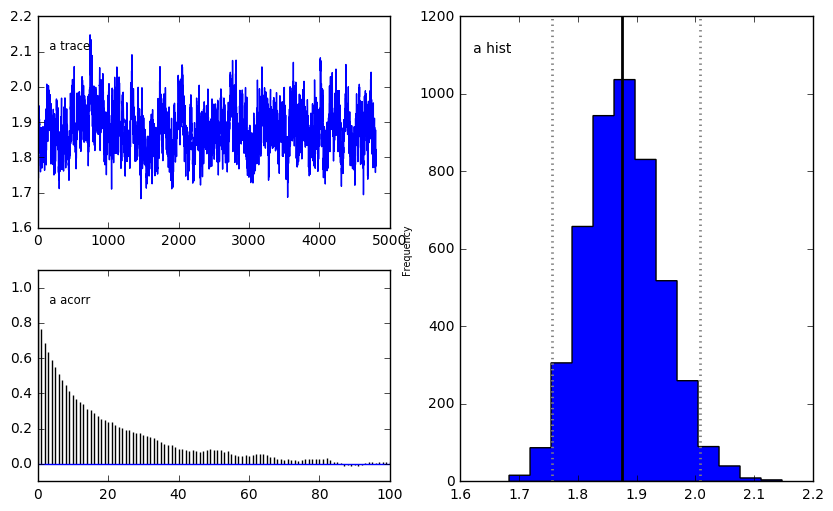

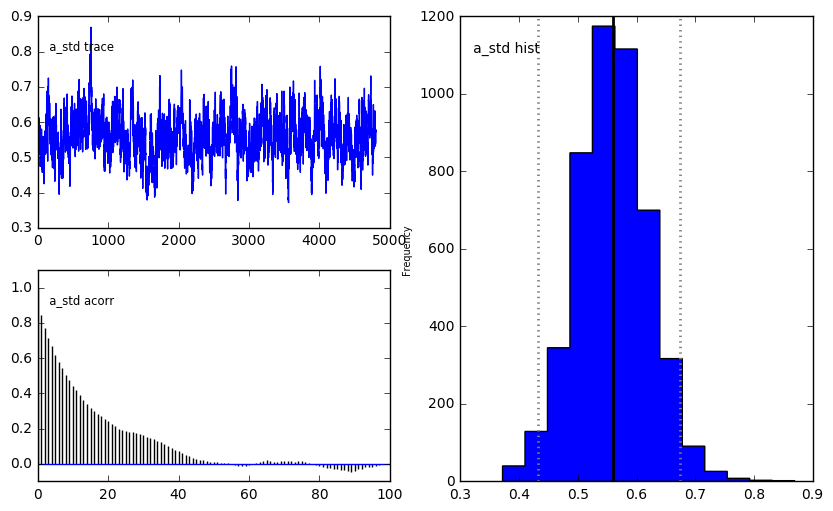

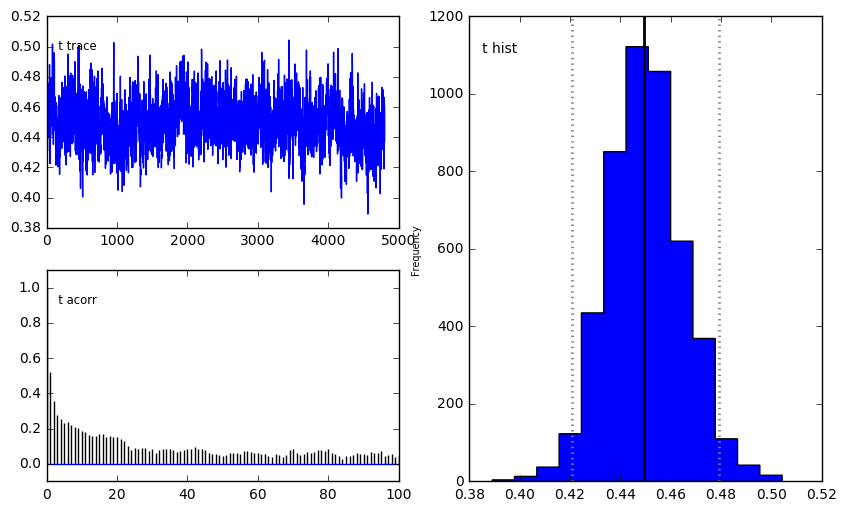

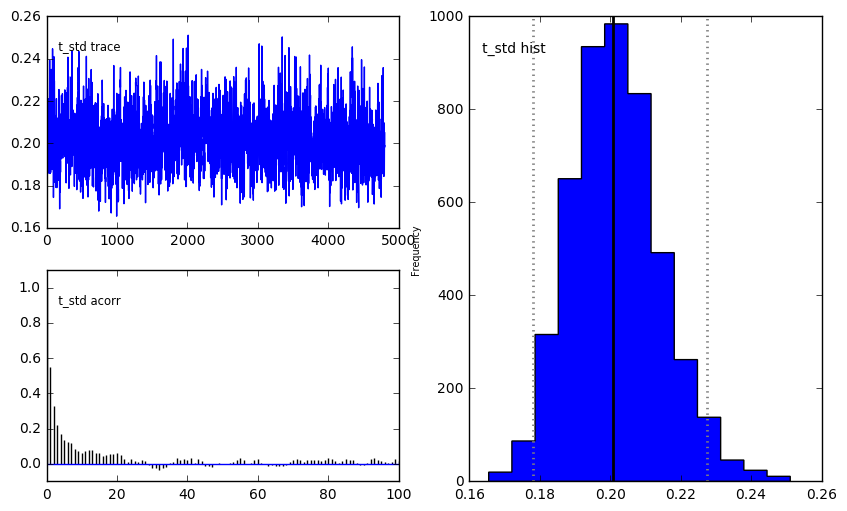

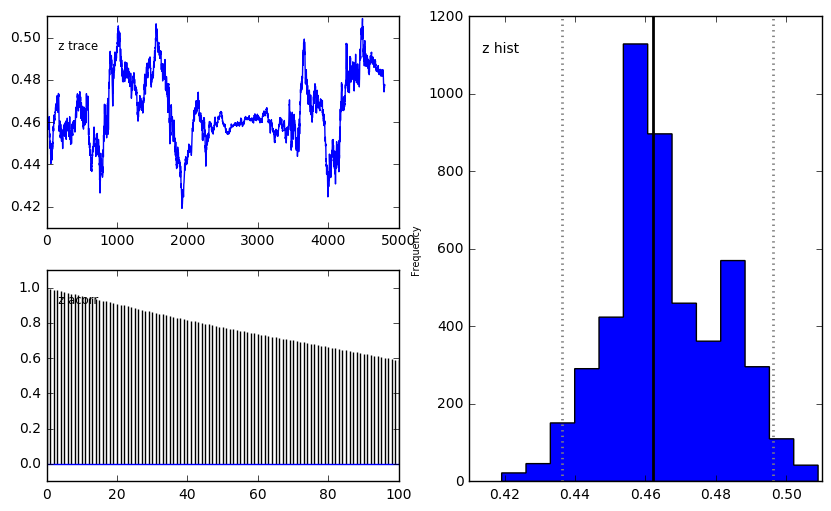

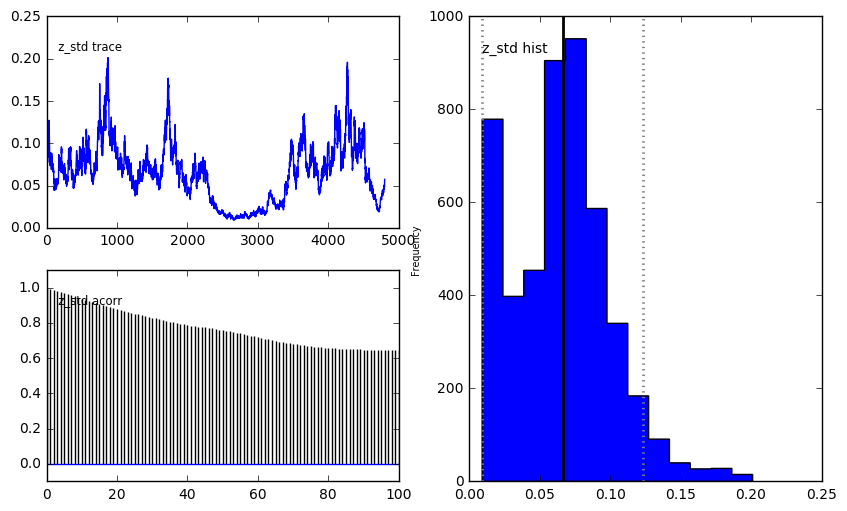

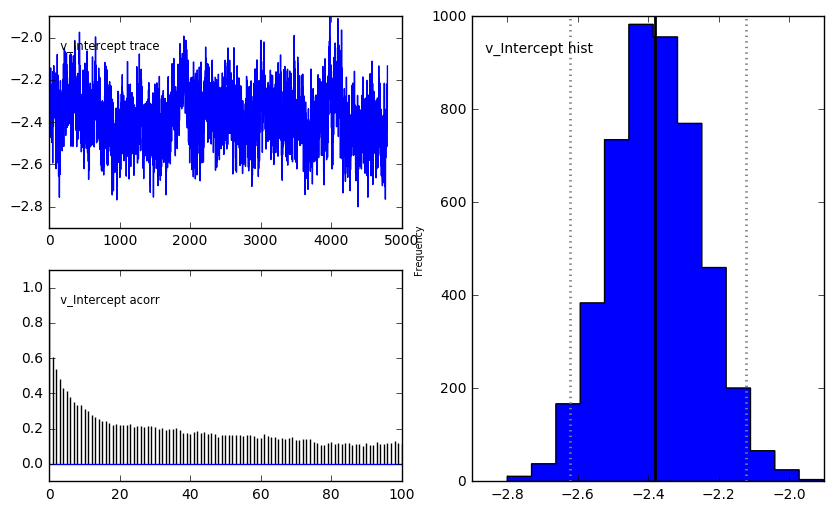

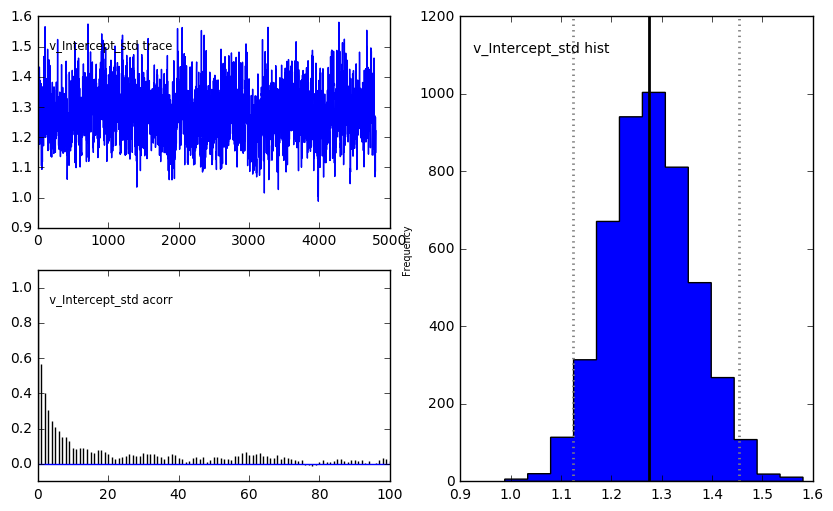

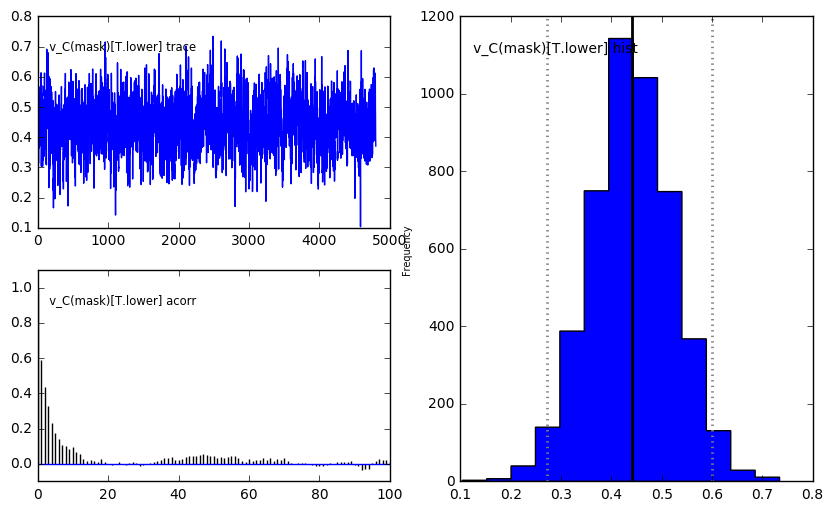

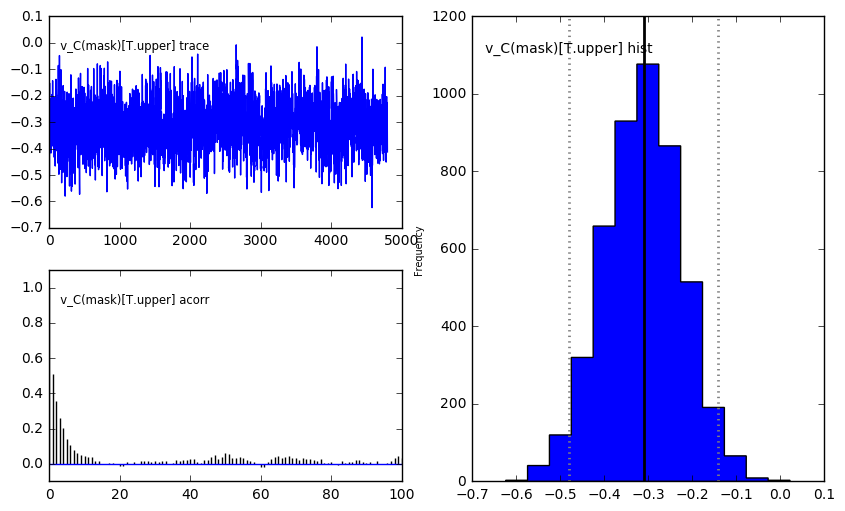

In [35]:
# run model
m_rs.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_rs.print_stats()
m_rs.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std      2.5q       25q  \
a                                   1.87722   0.065188   1.75891   1.83182   
a_std                              0.559747  0.0610767  0.437975  0.519393   
a_subj.09coqg8hlpux6fe              1.47398   0.290495   1.00305   1.26363   
a_subj.0b3t2skj9mlhbkn              2.06187   0.450124    1.3127   1.75145   
a_subj.0bcg7mtj2n1jjw9              2.88699   0.513191   1.99984   2.52775   
a_subj.0s53r30oouek89b              2.63835   0.566463   1.76464   2.23062   
a_subj.0uj9gbhag3o1w1v              1.96887   0.521975   1.14945   1.58367   
a_subj.17nzn4k8r1qkmrn              2.16585   0.462119   1.41102   1.83676   
a_subj.1fdkw2qjx3hc3lk              2.05984   0.450824   1.31351   1.73953   
a_subj.1mla0dmotqefnav              1.76801   0.339734     1.232   1.52259   
a_subj.23hr9tl84h3zhw3               2.5514   0.500867   1.75337   2.19387   
a_subj.27muqwvalwne26r               2.1328   0.489298   1.35202

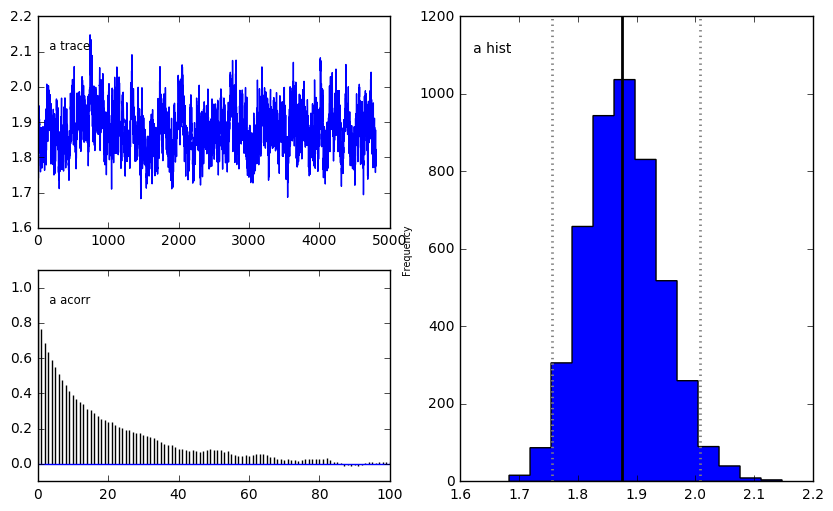

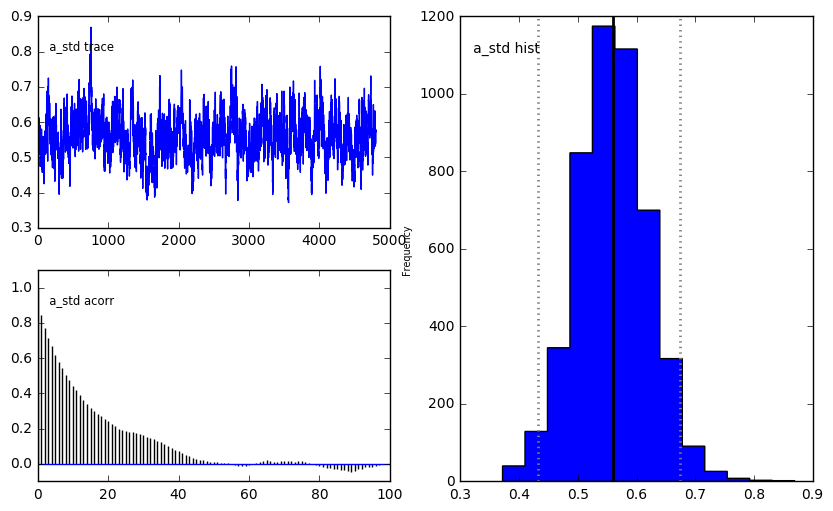

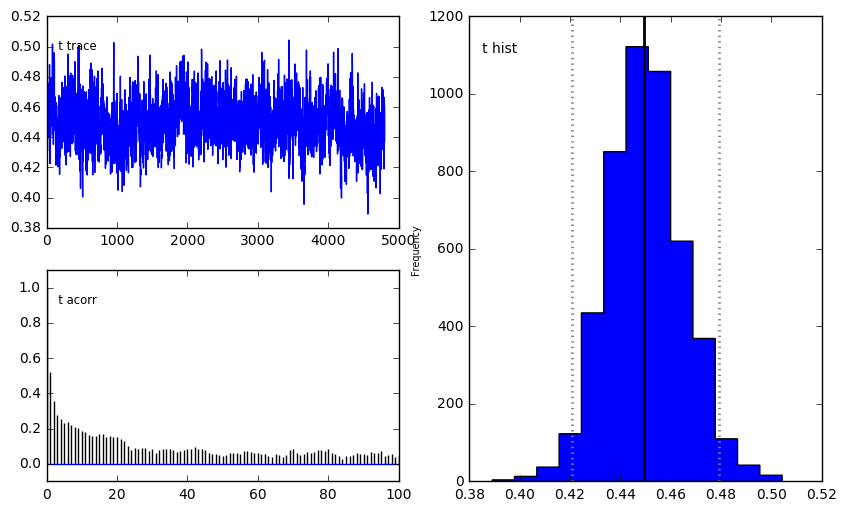

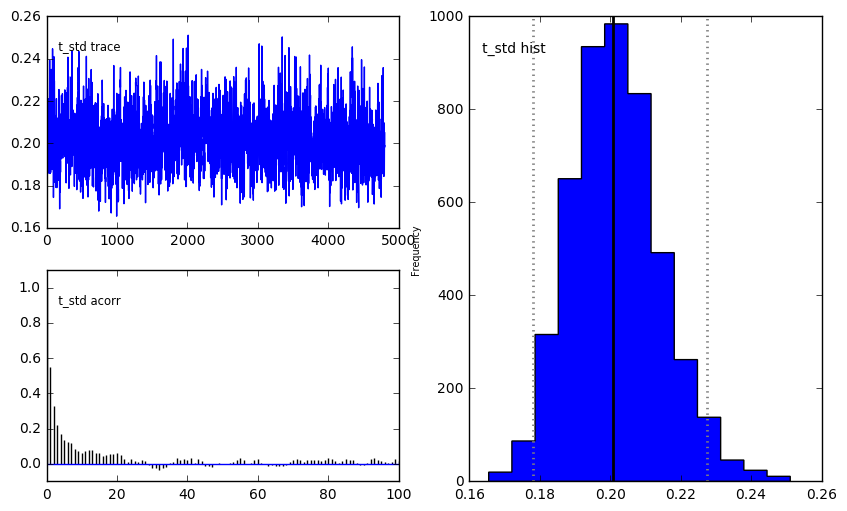

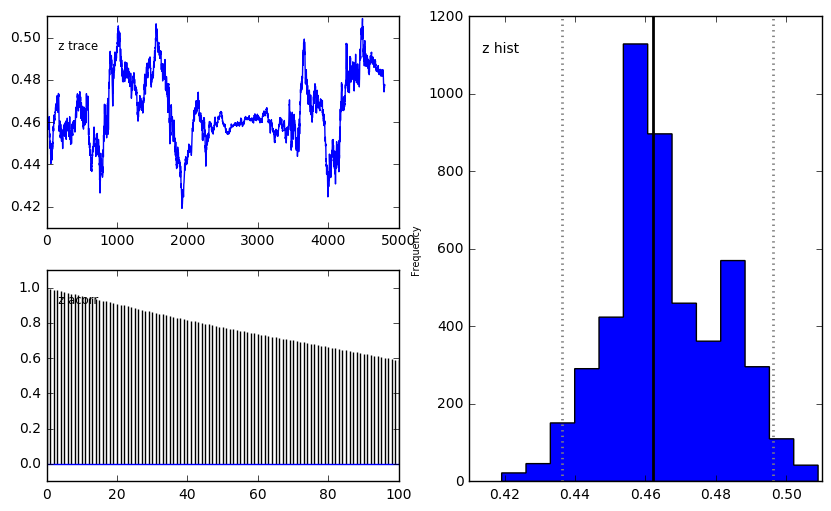

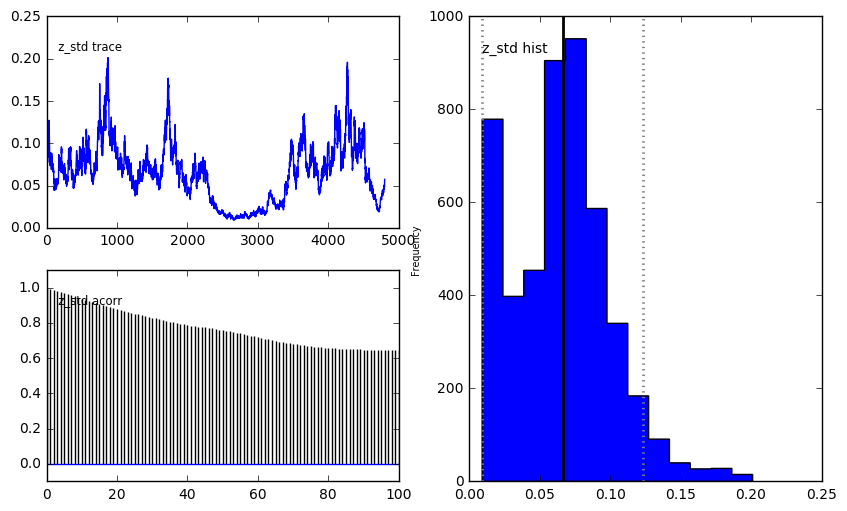

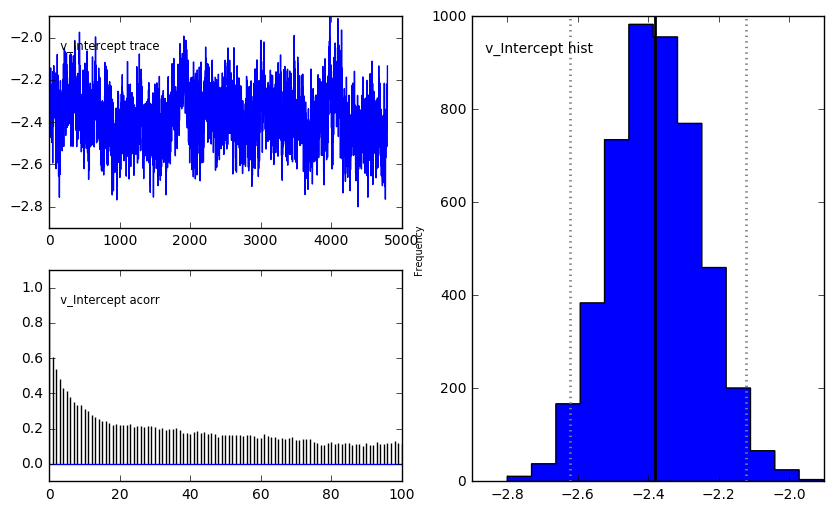

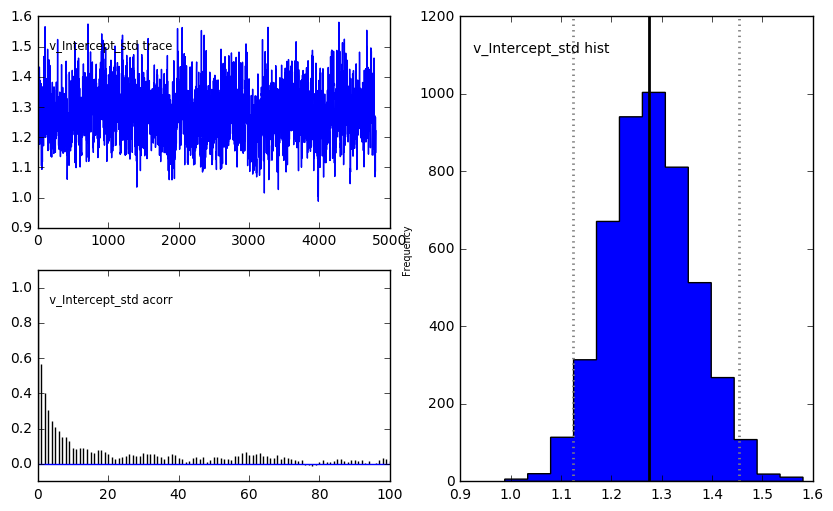

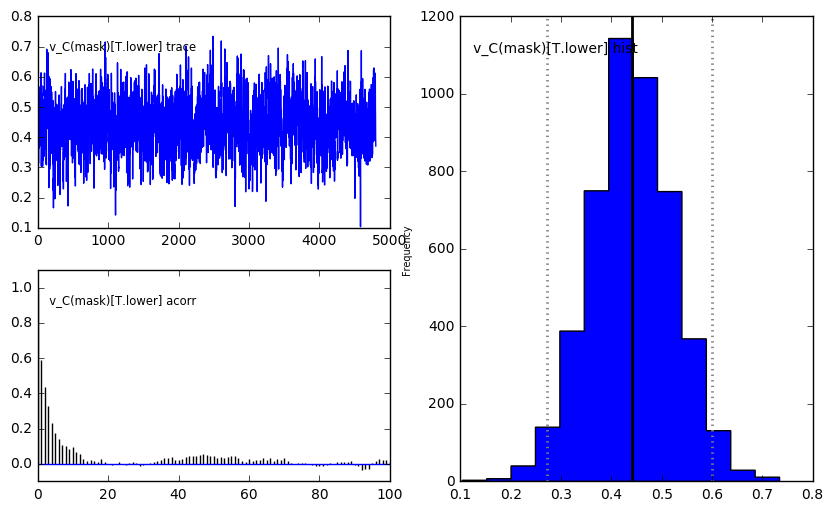

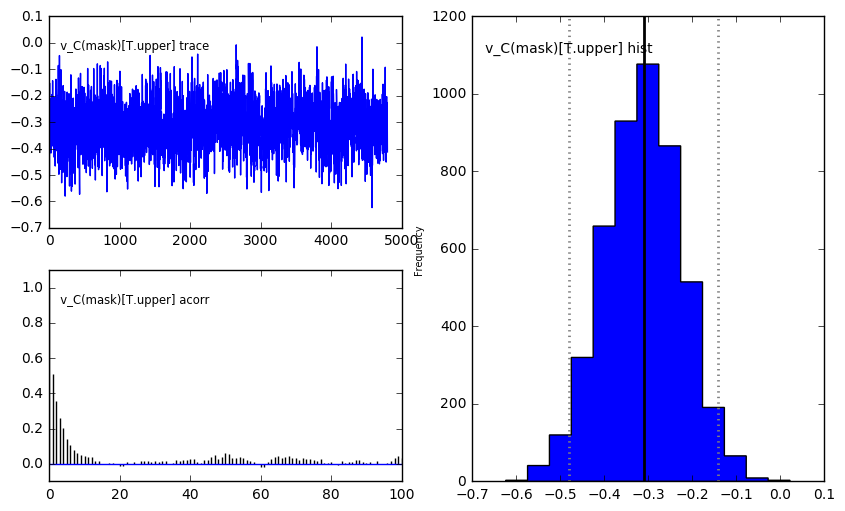

In [36]:
# save model stats
rs_stats = m_rs.gen_stats()
print(rs_stats)
rs_stats.to_csv('rs_5000/faceMask_hddm_drift_maskFalsePositives_rs_5000.csv', index=True)

# save model posterior plots
m_rs.plot_posteriors(path='rs_5000/_posteriors', save=True)

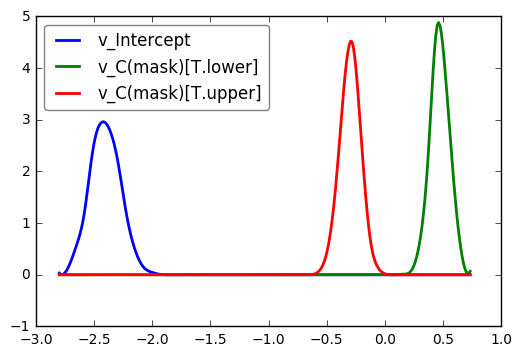

In [37]:
# plot model posteriors by mask
rs_v_none, rs_v_lower, rs_v_upper = m_rs.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([rs_v_none, rs_v_lower, rs_v_upper])
plt.savefig('rs_5000/faceMask_hddm_drift_maskFalsePositives_rs_5000_v_mask.pdf')

In [38]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(rs_v_none < 0) = ", (rs_v_none.trace() < 0).mean())
print("P(rs_v_lower < 0) = ", (rs_v_lower.trace() < 0).mean())
print("P(rs_v_upper > 0) = ", (rs_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(rs_v_lower < rs_v_upper) = ", (rs_v_lower.trace() < rs_v_upper.trace()).mean())

P(rs_v_none < 0) =  1.0
P(rs_v_lower < 0) =  0.0
P(rs_v_upper > 0) =  0.000208333333333
P(rs_v_lower < rs_v_upper) =  0.0
